
<h1 align="center">  Restaurant and Coffee House Chains in TORONTO </h1>

<h2 align="center"> Applied Data Science Capstone by IBM/Coursera (Code) </h2>

<h4 align="center">  </h4>


In [ ]:
import numpy as np       # library to handle vector arrays
import pandas as pd      # library for data analysis

import json         # library to handle JSON files
import requests     # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans          # k-means for clustering data
from sklearn.cluster import MiniBatchKMeans # k-means for clustering data

# use the inline backend to generate the plots within the browser
%matplotlib inline 
#
import matplotlib as mpl
import matplotlib.pyplot as plt
#
# mpl.style.use('ggplot')   # optional: for ggplot-like style
# print ('Matplotlib version: ', mpl.__version__) # optional: version of Matplotlib
#
import matplotlib.cm as cm
import matplotlib.colors as colors

import folium     # map rendering library

import os
import math


In [76]:
pip install --quiet geopy    # run in separate cell

Note: you may need to restart the kernel to use updated packages.


In [2]:
from geopy.geocoders import Nominatim


In [4]:
pip install --quiet pandas-profiling[notebook,html]    # run in separate cell

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas_profiling import ProfileReport


In [6]:
pip install --quiet ipywidgets   # run in separate cell 

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ipywidgets import GridspecLayout


# Phase One

<a id='item1'></a>

### (1) Toronto neighborhoods: Locations Affiliated with Postal Codes

In order to segment the neighborhoods and explore them, we essentially need:  <br>
(1) the data that contains the boroughs and the neighborhoods that exist in each borough, <br>
(2) the latitude and longitude coordinates of each neighborhood. <br>


In [4]:
# Read csv-file into pandas DataFrame
# NOTE: DataFrame with 3 columns named as PostalCode, Borough, Neighborhood.
# NOTE: DataFrame represents 11 boroughs and 208 neighborhoods of the City of Toronto. 
#
df2 = pd.read_csv('toronto_code_borrow.csv')
df2.head(5)


,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


### (2) Toronto neighborhoods: Geographical Coordinates

In [5]:
# Read csv-file into pandas DataFrame
# NOTE: DataFrame with 3 columns named as Postal Code, Latitude, Longitude.
# NOTE: DataFrame represents 103 postal-code-centers in the City of Toronto. 
#
dg0 = pd.read_csv('Geospatial_Coordinates.csv', header=0)
dg0.head(5)


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### (3) Toronto neighborhoods: Combined Dataframe

In [6]:
# Re-arrange 2 dataframes to create the new one
#
df3 = pd.concat([ df2[['PostalCode', 'Borough', 'Neighborhood']], dg0 [['Latitude', 'Longitude']] ], axis=1)
df3.head(5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [ ]:
# Write df3 to the csv-file
df3.to_csv('toronto_code_borrow_location.csv', sep=',', index=False)


### (4) Scarborough and its neighborhoods

We are going to segment and cluster the neighborhoods in **Scarborough**. <br> 
For that we create a new dataframe of the **Scarborough** data only. <br>
Then we visualize the **Scarborough** and the neighborhoods in this borough.

In [7]:
# create a DataFrame of Scarborough data only
#
scarbo_data = df3[ df3['Borough'] == 'Scarborough'].reset_index(drop=True)
scarbo_data.head(5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


There are **17 combined neighborhoods** in the **Scarborough** borough. 

In [7]:
# Write pandas DataFrame to the csv-file
scarbo_data.to_csv('scarbo_data_winter.csv', sep=',', index=False)

In [8]:

geolocator = Nominatim(user_agent="scarbo_explorer")
location = geolocator.geocode('SCARBOROUGH, ON')
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of SCARBOROUGH, ON are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of SCARBOROUGH, ON are 43.773077, -79.257774.


In [9]:
# create a map of Scarborough (Toronto) using latitude and longitude values
map_scarbo = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of neighborhoods to the map
for lat, lng, neighb in zip(scarbo_data['Latitude'], scarbo_data['Longitude'], scarbo_data['Neighborhood']):
    label = '{}'.format(neighb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=20,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_scarbo)

map_scarbo

### (5) Etobicoke and its neighborhoods

We are going to segment and cluster the neighborhoods in **Etobicoke**. <br> 
For that we create a new dataframe of the **Etobicoke** data only. <br>
Then we visualize the **Etobicoke** and the neighborhoods in this borough.

In [10]:
# create a DataFrame of Etobicoke data only
#
etobi_data = df3[ df3['Borough'] == 'Etobicoke'].reset_index(drop=True)
etobi_data.head(5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M8V,Etobicoke,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321
1,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484
2,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
3,M8Y,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So...",43.636258,-79.498509
4,M8Z,Etobicoke,"Kingsway Park South West, Mimico NW, The Queen...",43.628841,-79.520999


There are **11 combined neighborhoods** in the **Etobicoke** borough. 

In [9]:
# Write pandas DataFrame to the csv-file
etobi_data.to_csv('etobi_data_winter.csv', sep=',', index=False)

In [11]:

geolocator = Nominatim(user_agent="etobi_explorer")
location = geolocator.geocode('ETOBICOKE, ON')
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ETOBICOKE, ON are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of ETOBICOKE, ON are 43.67145915, -79.5524920661.


In [12]:
# create a map of Etobicoke (Toronto) using latitude and longitude values
map_etobi = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of neighborhoods to the map
for lat, lng, neighb in zip(etobi_data['Latitude'], etobi_data['Longitude'], etobi_data['Neighborhood']):
    label = '{}'.format(neighb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=20,
        popup=label,
        color='green',
        fill=True,
        fill_color='#71bf30',
        fill_opacity=0.2,
        parse_html=False).add_to(map_etobi)

map_etobi

### (6) Define Foursquare Client Credentials and Version

Now we start utilizing the **Foursquare API** to explore neighborhoods in a given borough.

In [13]:
# For security reasons, personal FourSquare ID and SECRET should be stored in a separate file. 
# Here, the code reads testword, CLIENT_ID, CLIENT_SECRET, testword from the specified file.
# Then, VERSION is assigned to the Foursquare API Version.
#
with open ("FourSquare--CLIENT.txt", "r") as myfile:
    lines = myfile.read().splitlines()
myfile.close()
testword=lines[0]
CLIENT_ID=lines[1]
CLIENT_SECRET=lines[2]
testword=lines[3]
#
VERSION = '20200131' # Foursquare API version
#
print( 'Client ID and Client Secret have been obtained.')
print( 'The Version is {}.'.format(VERSION))
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

Client ID and Client Secret have been obtained.
The Version is 20200131.


In [14]:
# function:   "getNearbyVenues"
# return "nearby_venues", a dataframe of venues of all categories, all neighborhoods
#
# creates a "venues_list" checking the neighborhoods one by one  
# makes the GET requests to Foursquare; extracts "8 features" from json-structure


def getNearbyVenues(names, latitudes, longitudes, RAD, LIM):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        limit = LIM   # limit number of venues returned by Foursquare API
        radius = RAD  # radius (meters) from the selected location
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['id'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'Neighborhood Latitude',
                             'Neighborhood Longitude',
                             'Venue',
                             'Venue id',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category']
    
    return(nearby_venues)


In [15]:
# function:   "get_CCss"
# return "df_CCss", a dataframe of venues of a particular category (sub-category), all neighborhoods
#
# creates "CC_category" and "CCss" lists checking the neighborhoods one by one  
# makes the GET requests to Foursquare; extracts "8 features" from json-structure
#
# [ii, venue_id, venue_name, venue_latlon[0], venue_latlon[1], venue_address, category_id, category_name]  
# ['nei','venue_id','venue_name','venue_lat','venue_lon','venue_addr','cate_id','cate_name']


def get_categories(categories):
    return [(cate['name'], cate['id']) for cate in categories]

def format_address(location):
    address = ', '.join(location['formattedAddress'])
    address = address.replace(', Canada', '')
    return address

def get_venues_near_location(lat, lon, category, client_id, client_secret, version, radius, limit):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   format_address(item['venue']['location']),
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues


def get_CCss(lats, lons, RAD, LIM, CC_code, CC_keyw):
    CC_category = []
    CCss = []
    
    # Category, CC_code is passing to get_venues_near_location   
    # Category, CC_keyw is used in category_name   

    fs_client_id=CLIENT_ID          # Foursquare
    fs_client_secret=CLIENT_SECRET  # Foursquare
    fs_version=VERSION              # Foursquare
    
    print('... gettings venues around given locations ...')
    ii = 0
    for lat, lon in zip(lats, lons):
        ii += 1
        # print( ii, ' lat & lon : ', lat, lon)
        venues = get_venues_near_location(lat, lon, CC_code, fs_client_id, fs_client_secret, fs_version, RAD, LIM)
        for venue in venues:
            venue_id = venue[0]
            venue_name = venue[1]
            venue_categories = venue[2]
            venue_latlon = venue[3]
            venue_address = venue[4]
            venue_distance = venue[5]
            
            for cc in venue_categories: 
                category_name = cc[0].lower()
                category_id = cc[1] 
                if CC_keyw in category_name: 
                    CC_category = [ii, venue_id, venue_name, venue_latlon[0], venue_latlon[1], venue_address, category_id, category_name]  
                    CCss.append(CC_category)
                    
    df_CCss = pd.DataFrame( CCss )
    df_CCss.columns = ['nei','venue_id','venue_name','venue_lat','venue_lon','venue_addr','cate_id','cate_name']
    
    print('... done ...')
    return df_CCss


In [16]:
# Function:         # EXTRA #   # TESTED #
# print by blocks to inspect the structure

def blo_CCss(CCss):
    blo = []
    for blo in CCss:
        print(blo)
    return


In [17]:
# Category, Coffee Shop:          CC_code = '4bf58dd8d48988d1e0931735'   
# Category, Coffee Shop:          CC_keyw = 'coffee shop'   
# Category, Fast Food Restaurant: CC_code = '4bf58dd8d48988d16e941735'   
# Category, Fast Food Restaurant: CC_keyw = 'fast food restaurant' 
#
# NOTE: under '4bf58dd8d48988d16e941735' detected also: chinese restaurant, noodle house, pizza place
# NOTE: under '4bf58dd8d48988d1e0931735' detected also: café, tea room

def info_CCss(): 
    print('Calling for the "Category" venues around given locations')
    CC_code = '4bf58dd8d48988d16e941735' 
    CC_keyw = 'fast food restaurant'
    print(' CC_code = {} ; CC_keyw = {} '.format(CC_code, CC_keyw) )
    CC_code = '4bf58dd8d48988d1e0931735' 
    CC_keyw = 'coffee shop'
    print(' CC_code = {} ; CC_keyw = {} '.format(CC_code, CC_keyw) )
    return


### (7) Explore Neighborhoods' Venues in SCARBOROUGH (Toronto)

We explore all neighborhoods in **Scarborough.** <br>
We are going to collect the top venues (limit is **100**) returned by Foursquare API, in every neighborhood in **Scarborough**, within a radius of **1250 meters.** <br>

In [18]:
# Create the pandas dataframe "scarbo_venues" with the venues in Scarborough 
#
scarbo_venues = getNearbyVenues(names=scarbo_data['Neighborhood'], 
                                latitudes=scarbo_data['Latitude'], 
                                longitudes=scarbo_data['Longitude'], RAD=1250, LIM=100 )


Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge


Hence, the code has generated data for **17 neighborhoods** in the **Scarborough** borough. 

In [23]:
scarbo_venues.head(5)

# print( "shape: ", scarbo_venues.shape, '\n' )
# print( "info:", scarbo_venues.info(), '\n' ) 


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,579a91b3498e9bd833afa78a,43.802008,-79.198080,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,Caribbean Wave,4b914562f964a520d4ae33e3,43.798558,-79.195777,Caribbean Restaurant
2,"Rouge, Malvern",43.806686,-79.194353,Wendy's,4bb6b9446edc76b0d771311c,43.807448,-79.199056,Fast Food Restaurant
3,"Rouge, Malvern",43.806686,-79.194353,Harvey's,4b6718c2f964a5203f3a2be3,43.800020,-79.198307,Restaurant
4,"Rouge, Malvern",43.806686,-79.194353,Staples Morningside,4bcb612d3740b713f0606265,43.800285,-79.196607,Paper / Office Supplies Store


Hence, we have the dataset of **536 venues** in **17 neighborhoods** in the **Scarborough** borough. 

Let's inspect the two working datasets, **scarbo_data** and **scarbo_venues**. 

In [22]:
print( len( scarbo_data['Neighborhood']), ' neighborhoods are in SCARBOROUGH.'  )
print( len( scarbo_venues['Neighborhood'].unique()), ' neighborhoods have venue records.' )
# scarbo_venues['Neighborhood'].unique()

17  neighborhoods are in SCARBOROUGH.
17  neighborhoods have venue records.


As we can see, **17 neighborhoods** (of the total number of **17**) have venue records. <br> 
Even **"Upper Rouge"** location,  adjacent to the large park area, has venues in the **Foursquare** database. <br> So, every neighborhood has its share in the venue analysis. 

Let's check the **duplicated** venues due to search overlap.

In [23]:
print( len( scarbo_venues['Venue id'].unique()), ' unique venues ' )
print( len( scarbo_venues['Venue id']), ' total venues \n')
#
print( 'Dataframe =scarbo_venues= contains duplicated venues due to search overlap.')
print( 'Dataframe =scarbo_venues= will be updated by removing duplicated venues. \n')

527  unique venues 
536  total venues 

Dataframe =scarbo_venues= contains duplicated venues due to search overlap.
Dataframe =scarbo_venues= will be updated by removing duplicated venues. 



In [24]:
# Finding the duplicates
# Getting a list of indices where pandas boolean series is True

bss = scarbo_venues.duplicated(['Venue id'], keep=False)
# bss.index[bss]
arss = bss.index[bss].values
arss

array([ 61,  64,  73,  77,  82,  83,  84,  87, 104, 124, 125, 127, 128,
       130, 166, 233, 310, 339])

In [25]:
scarbo_venues.iloc[ [ 61,  64,  73,  77,  82,  83,  84,  87, 104, 124, 125, 127, 128, 130, 166, 233, 310, 339 ] ]


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
61,Woburn,43.770992,-79.216917,The Real McCoy Burgers And Pizza,4bf470256a31d13a9ec7952e,43.774081,-79.230496,Burger Joint
64,Woburn,43.770992,-79.216917,Govardhan Thal,4bd48a734e32d13a4254bf80,43.767496,-79.228476,Indian Restaurant
73,Woburn,43.770992,-79.216917,Bombay Palace,4c632edeedd320a19ad5ae29,43.767057,-79.227682,Indian Restaurant
77,Woburn,43.770992,-79.216917,Fabian's Cafe,4e0a53e3d164028d170dc1b6,43.768158,-79.229159,Bakery
82,Woburn,43.770992,-79.216917,Mac's,4bf471a094af2d7f299f3a72,43.773949,-79.230272,Pharmacy
83,Woburn,43.770992,-79.216917,Rexall PharmaPlus,4cdededf70bba1cdbe1a63c4,43.775313,-79.231020,Pharmacy
84,Woburn,43.770992,-79.216917,Pizza Nova,4c097c1bbbc676b0674a48d5,43.776973,-79.229830,Pizza Place
87,Cedarbrae,43.773136,-79.239476,The Real McCoy Burgers And Pizza,4bf470256a31d13a9ec7952e,43.774081,-79.230496,Burger Joint
104,Cedarbrae,43.773136,-79.239476,Govardhan Thal,4bd48a734e32d13a4254bf80,43.767496,-79.228476,Indian Restaurant
124,Cedarbrae,43.773136,-79.239476,Rexall PharmaPlus,4cdededf70bba1cdbe1a63c4,43.775313,-79.231020,Pharmacy


In [26]:
# add markers of duplicated venues to the existing map

for ii in arss:
    lat = scarbo_venues['Venue Latitude'].iloc[ii]
    lng = scarbo_venues['Venue Longitude'].iloc[ii]
    label = '{}'.format(scarbo_venues['Venue'].iloc[ii])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_scarbo)

map_scarbo

There are 9 venues counted twice. They are listed in the previous output and shown on the map with red circles. <br> 
After visual inspection of the neighborhood boundaries on the map, <br> 
we retain the venues with `iloc[ 64, 73, 77, 87, 124, 125, 127, 233, 339 ]` <br>
and discard the venues with `iloc[ 61, 82, 83, 84, 104, 128, 130, 166, 310 ]`.

In [27]:
scarbo_venues.drop( [scarbo_venues.index[61], 
                     scarbo_venues.index[82], 
                     scarbo_venues.index[83], 
                     scarbo_venues.index[84], 
                     scarbo_venues.index[104], 
                     scarbo_venues.index[128], 
                     scarbo_venues.index[130], 
                     scarbo_venues.index[166], 
                     scarbo_venues.index[310] ], inplace=True)

scarbo_venues.reset_index(drop=True)

# scarbo_venues
print( "shape: ", scarbo_venues.shape, '\n' )


shape:  (527, 8) 



Thus, we have updated the dataframe **scarbo_venues**.

In [28]:
# Write pandas DataFrame to the csv-file
scarbo_venues.to_csv('scarbo_venues_winter.csv', sep=',', index=False)


In [ ]:
# Remove a dataframe from RAM
del [ scarbo_venues ]

# Read csv-file into pandas DataFrame
scarbo_venues = pd.read_csv('scarbo_venues_winter.csv', header=0)


In [29]:
scarbo_venues


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,579a91b3498e9bd833afa78a,43.802008,-79.198080,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,Harvey's,4b6718c2f964a5203f3a2be3,43.800020,-79.198307,Restaurant
2,"Rouge, Malvern",43.806686,-79.194353,Wendy's,4bb6b9446edc76b0d771311c,43.807448,-79.199056,Fast Food Restaurant
3,"Rouge, Malvern",43.806686,-79.194353,Caribbean Wave,4b914562f964a520d4ae33e3,43.798558,-79.195777,Caribbean Restaurant
4,"Rouge, Malvern",43.806686,-79.194353,Staples Morningside,4bcb612d3740b713f0606265,43.800285,-79.196607,Paper / Office Supplies Store
...,...,...,...,...,...,...,...,...
522,L'Amoreaux West,43.799525,-79.318389,Petro-Canada,4bdf9084e75c0f47c5c2cb03,43.793777,-79.330900,Gas Station
523,L'Amoreaux West,43.799525,-79.318389,Northhill Meats And Deli,4df4f040fa76abc3d871d54f,43.798475,-79.333323,Deli / Bodega
524,L'Amoreaux West,43.799525,-79.318389,Kidstown Water Park,4c4f0c8a92b6a593ccacf070,43.808227,-79.309434,Pool
525,L'Amoreaux West,43.799525,-79.318389,LCBO,4cc34b311e596dcb5f89c967,43.793970,-79.329729,Liquor Store


### (8) Explore Neighborhoods' Venues in ETOBICOKE (Toronto)

We explore all neighborhoods in **Etobicoke.** <br>
We are going to collect the top venues (limit is **100**) returned by Foursquare API, in every neighborhood in **Etobicoke**, within a radius of **1250 meters.** <br>

In [24]:
# Create the pandas dataframe "scarbo_venues" with the venues in Etobicoke 
#
etobi_venues = getNearbyVenues(names=etobi_data['Neighborhood'], 
                                latitudes=etobi_data['Latitude'], 
                                longitudes=etobi_data['Longitude'], RAD=1250, LIM=100 )


Humber Bay Shores, Mimico South, New Toronto
Alderwood, Long Branch
The Kingsway, Montgomery Road, Old Mill North
Humber Bay, King's Mill Park, Kingsway Park South East, Mimico NE, Old Mill South, The Queensway East, Royal York South East, Sunnylea
Kingsway Park South West, Mimico NW, The Queensway West, Royal York South West, South of Bloor
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Westmount
Kingsview Village, Martin Grove Gardens, Richview Gardens, St. Phillips
Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown
Northwest


Hence, the code has generated data for **11 neighborhoods** in the **Etobicoke** borough. 

In [27]:
etobi_venues.head(5)

# print( "shape: ", etobi_venues.shape, '\n' )
# print( "info:", etobi_venues.info(), '\n' ) 


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,LCBO,4b119977f964a520488023e3,43.602281,-79.499302,Liquor Store
1,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Huevos Gourmet,5395d784498e085ff3c18198,43.601188,-79.503717,Mexican Restaurant
2,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Sweet Olenka's,4c081867ffb8c9b6d7b66761,43.601099,-79.500325,Dessert Shop
3,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Kitchen on 6th,571cdf3e38faaa76e74049d7,43.601396,-79.504563,Breakfast Spot
4,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Cellar Door Restaurant,53938d4c498ea919cfa0117f,43.600221,-79.507638,Italian Restaurant


Hence, we have the dataset of **370 venues** in **11 neighborhoods** in the **Etobicoke** borough. 

Let's inspect the two working datasets, **etobi_data** and **etobi_venues**. 

In [34]:
print( len( etobi_data['Neighborhood']), ' neighborhoods are in ETOBICOKE.'  )
print( len( etobi_venues['Neighborhood'].unique()), ' neighborhoods have venue records.' )
# etobi_venues['Neighborhood'].unique()

11  neighborhoods are in ETOBICOKE.
11  neighborhoods have venue records.


As we can see, **11 neighborhoods** (of the total number of **11**) have venue records. <br> 
So, every neighborhood has its share in the venue analysis. 

Let's check the **duplicated** venues due to search overlap.

In [35]:
print( len( etobi_venues['Venue id'].unique()), ' unique venues ' )
print( len( etobi_venues['Venue id']), ' total venues \n')
#
print( 'Dataframe =etobi_venues= contains duplicated venues due to search overlap.')
print( 'Dataframe =etobi_venues= will be updated by removing duplicated venues. \n')

363  unique venues 
370  total venues 

Dataframe =etobi_venues= contains duplicated venues due to search overlap.
Dataframe =etobi_venues= will be updated by removing duplicated venues. 



In [36]:
# Finding the duplicates
# Getting a list of indices where pandas boolean series is True

bee = etobi_venues.duplicated(['Venue id'], keep=False)
# bee.index[bee]
aree = bee.index[bee].values
aree

array([228, 244, 285, 286, 287, 299, 302, 304, 315, 316, 317, 326, 332,
       334])

In [37]:
etobi_venues.iloc[ [228, 244, 285, 286, 287, 299, 302, 304, 315, 316, 317, 326, 332, 334] ]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
228,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724,Tim Hortons,50d4866ee4b0c1554d94fef7,43.644705,-79.567659,Coffee Shop
244,"Bloordale Gardens, Eringate, Markland Wood, Ol...",43.643515,-79.577201,Tim Hortons,50d4866ee4b0c1554d94fef7,43.644705,-79.567659,Coffee Shop
285,Westmount,43.696319,-79.532242,Tim Hortons,4ede72ca77c8274e01ddd28b,43.696170,-79.544922,Coffee Shop
286,Westmount,43.696319,-79.532242,No Frills,50a26679e4b0ffcdfe90d654,43.695887,-79.544835,Grocery Store
287,Westmount,43.696319,-79.532242,Tim Hortons / Esso,53502b6f498ed97618d62ba8,43.696703,-79.546227,Coffee Shop
299,Westmount,43.696319,-79.532242,241 Pizza,4bd3cec4046076b002037771,43.696775,-79.544214,Pizza Place
302,Westmount,43.696319,-79.532242,TTC 37 Islington Bus,51d62d13498ee12c4f75b852,43.697042,-79.546385,Bus Line
304,Westmount,43.696319,-79.532242,GNC,4d9f62be0ea841bd6991dbd7,43.691625,-79.546012,Supplement Shop
315,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,Tim Hortons / Esso,53502b6f498ed97618d62ba8,43.696703,-79.546227,Coffee Shop
316,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,Tim Hortons,4ede72ca77c8274e01ddd28b,43.696170,-79.544922,Coffee Shop


In [38]:
# add markers of duplicated venues to the existing map

for ii in aree:
    lat = etobi_venues['Venue Latitude'].iloc[ii]
    lng = etobi_venues['Venue Longitude'].iloc[ii]
    label = '{}'.format(etobi_venues['Venue'].iloc[ii])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_etobi)

map_etobi

There are 7 venues counted twice. They are listed in the previous output and on the map with red circles. <br> 
After visual inspection of the neighborhood boundaries on the map, <br> 
we retain the venues   with `iloc[ 244, 285, 286, 287, 299, 302, 326 ]` <br>
and discard the venues with `iloc[ 228, 304, 315, 316, 317, 332, 334 ]`.

In [39]:
etobi_venues.drop( [etobi_venues.index[228], 
                    etobi_venues.index[304], 
                    etobi_venues.index[315], 
                    etobi_venues.index[316], 
                    etobi_venues.index[317], 
                    etobi_venues.index[332], 
                    etobi_venues.index[334] ], inplace=True)

etobi_venues.reset_index(drop=True)

# scarbo_venues
print( "shape: ", etobi_venues.shape, '\n' )


shape:  (363, 8) 



Thus, we have updated the dataframe **etobi_venues**.

In [40]:
# Write pandas DataFrame to the csv-file
etobi_venues.to_csv('etobi_venues_winter.csv', sep=',', index=False)


In [ ]:
# Remove a dataframe from RAM
del [ etobi_venues ]

# Read csv-file into pandas DataFrame
etobi_venues = pd.read_csv('etobi_venues_winter.csv', header=0)


In [41]:
etobi_venues


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,LCBO,4b119977f964a520488023e3,43.602281,-79.499302,Liquor Store
1,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Huevos Gourmet,5395d784498e085ff3c18198,43.601188,-79.503717,Mexican Restaurant
2,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Sweet Olenka's,4c081867ffb8c9b6d7b66761,43.601099,-79.500325,Dessert Shop
3,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Kitchen on 6th,571cdf3e38faaa76e74049d7,43.601396,-79.504563,Breakfast Spot
4,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,Cellar Door Restaurant,53938d4c498ea919cfa0117f,43.600221,-79.507638,Italian Restaurant
...,...,...,...,...,...,...,...,...
358,Northwest,43.706748,-79.594054,Woodbine Hotel & Suites,4fa3ca28e4b05ddd65da97ae,43.712624,-79.592664,Hotel
359,Northwest,43.706748,-79.594054,Toronto Pearson International Airport Pet Park,53c181eb498eb5bf28f6ab80,43.704901,-79.604441,Dog Run
360,Northwest,43.706748,-79.594054,Enterprise Rent-A-Car,4d764ad4f5e4b1f7b07e0187,43.715260,-79.589320,Rental Car Location
361,Northwest,43.706748,-79.594054,Fitness Two 4,4dadba464df0522cc5608a66,43.714482,-79.582903,Gym


## (9) Calling for FFRs and CSs in SCARBOROUGH (Toronto)

In [45]:

print('***SCARBOROUGH***')
lats=scarbo_data['Latitude']
lons=scarbo_data['Longitude']
RAD = 1250
LIM = 100
info_CCss()
#
CC_keyw = 'fast food restaurant'
CC_code = '4bf58dd8d48988d16e941735'
df_FFRs = get_CCss(lats, lons, RAD, LIM, CC_code, CC_keyw)
#    
CC_keyw = 'coffee shop' 
CC_code = '4bf58dd8d48988d1e0931735'
df_CSs = get_CCss(lats, lons, RAD, LIM, CC_code, CC_keyw)
#   
print('Total number of FFRs: ', len(df_FFRs.index))
print('Total number of CSs: ',  len(df_CSs.index))


***SCARBOROUGH***
Calling for the "Category" venues around given locations
 CC_code = 4bf58dd8d48988d16e941735 ; CC_keyw = fast food restaurant 
 CC_code = 4bf58dd8d48988d1e0931735 ; CC_keyw = coffee shop 
... gettings venues around given locations ...
... done ...
... gettings venues around given locations ...
... done ...
Total number of FFRs:  62
Total number of CSs:  46


In [49]:
df_FFRs.head(5) ;
df_CSs.head(5) ;

In [60]:
# Finding the duplicates
# Getting a list of indices where pandas boolean series is True

bss = df_FFRs.duplicated(['venue_id'], keep=False)
arss = bss.index[bss].values
print('Duplicates in FFRe: ', arss )
del [bss, arss]

bss = df_CSs.duplicated(['venue_id'], keep=False)
arss = bss.index[bss].values
print('Duplicates in CSe: ', arss )
del [bss, arss]


Duplicates in FFRe:  [24 33]
Duplicates in CSe:  []


In [57]:
df_FFRs.iloc[ [24, 33] ]

# df_CSs.iloc[ [] ]

,nei,venue_id,venue_name,venue_lat,venue_lon,venue_addr,cate_id,cate_name
24,7,519d731e498e937ddd96d09b,KFC,43.723232,-79.249682,"2383 Kingston Road, Toronto ON M1N 4E7",4bf58dd8d48988d16e941735,fast food restaurant
33,9,519d731e498e937ddd96d09b,KFC,43.723232,-79.249682,"2383 Kingston Road, Toronto ON M1N 4E7",4bf58dd8d48988d16e941735,fast food restaurant


In [62]:
# Discard the duplicates and update the dataframes
# Dataframes: df_FFRs and df_CSs

df_FFRs.drop( [ df_FFRs.index[33] ], inplace=True)
df_FFRs.reset_index(drop=True)
print( "shape: ", df_FFRs.shape, '\n' )

# df_CSs.drop( [  ], inplace=True)
# df_CSs.reset_index(drop=True)
# print( "shape: ", df_CSs.shape, '\n' )


shape:  (61, 8) 



In [66]:
# Write pandas DataFrame to the csv-file
df_FFRs.to_csv('scarbo_FFRs_winter.csv', sep=',', index=False)
df_CSs.to_csv('scarbo_CSs_winter.csv', sep=',', index=False)


In [68]:
# Remove a dataframe from RAM
del [ df_FFRs, df_CSs ]

# Read csv-file into pandas DataFrame
df_FFRs = pd.read_csv('scarbo_FFRs_winter.csv', header=0)
df_CSs = pd.read_csv('scarbo_CSs_winter.csv', header=0) 


In [ ]:
df_FFRs.head(5) 
df_CSs.head(5) 

In [79]:
# print( df_FFRs.query( 'venue_name == "Burger King"' ).index )
# print( df_CSs.query( 'venue_name == "Tim Hortons"' ).index )
print( '' )
print( df_FFRs[ df_FFRs['venue_name'].str.contains('Burger King')].index )
print( df_CSs[  df_CSs['venue_name'].str.contains('Tim Hortons')].index ) 


Int64Index([41, 45], dtype='int64')
Int64Index([ 1,  2,  4,  8, 10, 11, 14, 16, 17, 18, 22, 23, 27, 29, 30, 31, 33,
            35, 36, 37, 38, 39, 42, 44, 45],
           dtype='int64')


In [81]:
# The geograpical coordinate of SCARBOROUGH, ON
[latitude, longitude ] = [ 43.773077, -79.257774]

# create a map of FFRs & CSs in Scarborough (Toronto) using latitude and longitude values
map_scarbo = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of neighborhoods to the map
for lat, lng, num in zip(df_FFRs['venue_lat'], df_FFRs['venue_lon'], df_FFRs.index):
    label = '{}'.format( df_FFRs.iloc[num].venue_name )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color = 'brown' if (df_FFRs.iloc[num].venue_name == 'Burger King') else 'blue',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scarbo)
#
for lat, lng, num in zip(df_CSs['venue_lat'], df_CSs['venue_lon'], df_CSs.index):
    label = '{}'.format( df_CSs.iloc[num].venue_name )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color = 'red' if (df_CSs.iloc[num].venue_name == 'Tim Hortons') else 'green',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scarbo)

map_scarbo

## (10) Calling for FFRs and CSs in ETOBICOKE (Toronto)

In [46]:

print('***ETOBICOKE***')
lats=etobi_data['Latitude']
lons=etobi_data['Longitude']
RAD = 1250
LIM = 100
info_CCss()
#
CC_keyw = 'fast food restaurant'
CC_code = '4bf58dd8d48988d16e941735'
df_FFRe = get_CCss(lats, lons, RAD, LIM, CC_code, CC_keyw)
#
CC_keyw = 'coffee shop' 
CC_code = '4bf58dd8d48988d1e0931735'
df_CSe = get_CCss(lats, lons, RAD, LIM, CC_code, CC_keyw)
#  
print('Total number of FFRe: ', len(df_FFRe.index))
print('Total number of CSe: ',  len(df_CSe.index))


***ETOBICOKE***
Calling for the "Category" venues around given locations
 CC_code = 4bf58dd8d48988d16e941735 ; CC_keyw = fast food restaurant 
 CC_code = 4bf58dd8d48988d1e0931735 ; CC_keyw = coffee shop 
... gettings venues around given locations ...
... done ...
... gettings venues around given locations ...
... done ...
Total number of FFRe:  21
Total number of CSe:  41


In [54]:
df_FFRe.head(5) ;
df_CSe.head(5) ;

In [63]:
# Finding the duplicates
# Getting a list of indices where pandas boolean series is True

bee = df_FFRe.duplicated(['venue_id'], keep=False)
aree = bee.index[bee].values
print('Duplicates in FFRs: ', aree )
del [bee, aree]

bee = df_CSe.duplicated(['venue_id'], keep=False)
aree = bee.index[bee].values
print('Duplicates in CSs: ', aree )
del [bee, aree]


Duplicates in FFRs:  []
Duplicates in CSs:  [23 26 29 30 31 32]


In [64]:
# df_FFRe.iloc[ [  ] ]

df_CSe.iloc[ [ 23, 26, 29, 30, 31, 32 ] ]

,nei,venue_id,venue_name,venue_lat,venue_lon,venue_addr,cate_id,cate_name
23,6,50d4866ee4b0c1554d94fef7,Tim Hortons,43.644705,-79.567659,"555 Burnhamthorpe Rd (at The West Mall), Etobi...",4bf58dd8d48988d1e0931735,coffee shop
26,7,50d4866ee4b0c1554d94fef7,Tim Hortons,43.644705,-79.567659,"555 Burnhamthorpe Rd (at The West Mall), Etobi...",4bf58dd8d48988d1e0931735,coffee shop
29,8,4ede72ca77c8274e01ddd28b,Tim Hortons,43.696170,-79.544922,"245 Dixon Rd (Islington Avenue), Etobicoke ON ...",4bf58dd8d48988d1e0931735,coffee shop
30,8,53502b6f498ed97618d62ba8,Tim Hortons / Esso,43.696703,-79.546227,"261 Dixon Rd, Etobicoke ON M9P 2M4",4bf58dd8d48988d1e0931735,coffee shop
31,9,53502b6f498ed97618d62ba8,Tim Hortons / Esso,43.696703,-79.546227,"261 Dixon Rd, Etobicoke ON M9P 2M4",4bf58dd8d48988d1e0931735,coffee shop
32,9,4ede72ca77c8274e01ddd28b,Tim Hortons,43.696170,-79.544922,"245 Dixon Rd (Islington Avenue), Etobicoke ON ...",4bf58dd8d48988d1e0931735,coffee shop


In [65]:
# Discard the duplicates and update the dataframes
# Dataframes: df_FFRe and df_CSe

# df_FFRe.drop( [  ], inplace=True)
# df_FFRe.reset_index(drop=True)
# print( "shape: ", df_FFRe.shape, '\n' )

df_CSe.drop( [df_CSe.index[26], df_CSe.index[31], df_CSe.index[32] ], inplace=True)
df_CSe.reset_index(drop=True)
print( "shape: ", df_CSe.shape, '\n' )


shape:  (38, 8) 



In [67]:
# Write pandas DataFrame to the csv-file
df_FFRe.to_csv('etobi_FFRe_winter.csv', sep=',', index=False)
df_CSe.to_csv('etobi_CSe_winter.csv', sep=',', index=False)


In [72]:
# Remove a dataframe from RAM
del [ df_FFRe , df_CSe ]

# Read csv-file into pandas DataFrame
df_FFRe = pd.read_csv('etobi_FFRe_winter.csv', header=0)
df_CSe = pd.read_csv('etobi_CSe_winter.csv', header=0) 


In [ ]:
df_FFRe.head(5) 
df_CSe.head(5)

In [80]:
# print( df_FFRe.query( 'venue_name == "Burger King"' ).index )
# print( df_CSe.query( 'venue_name == "Tim Hortons"' ).index )
print( '' )
print( df_FFRe[ df_FFRe['venue_name'].str.contains('Burger King')].index )
print( df_CSe[  df_CSe['venue_name'].str.contains('Tim Hortons')].index ) 
print( '' )


Int64Index([], dtype='int64')
Int64Index([0, 4, 5, 6, 12, 14, 15, 17, 18, 19, 20, 21, 23, 28, 29, 31, 34, 36,
            37],
           dtype='int64')



In [82]:
# The geograpical coordinate of ETOBICOKE, ON
[latitude, longitude ] = [ 43.671459, -79.552492]

# create a map of FFRe & CSe in Etobicoke (Toronto) using latitude and longitude values
map_etobi = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers of neighborhoods to the map
for lat, lng, num in zip(df_FFRe['venue_lat'], df_FFRe['venue_lon'], df_FFRe.index):
    label = '{}'.format( df_FFRe.iloc[num].venue_name )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color = 'brown' if (df_FFRe.iloc[num].venue_name == 'Burger King') else 'blue',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_etobi)
#
for lat, lng, num in zip(df_CSe['venue_lat'], df_CSe['venue_lon'], df_CSe.index):
    label = '{}'.format( df_CSe.iloc[num].venue_name )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color = 'red' if (df_CSe.iloc[num].venue_name == 'Tim Hortons') else 'green',
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_etobi)

map_etobi

# Phase Two

## All Venue Categories, A General Look

Let's check how many **venues** (unique) and **venue categories** (unique) can be curated from all returned venues, <br> in Scarborough.

In [12]:
num_venues_unique = len( scarbo_venues['Venue'].unique() )
num_categ_unique = len( scarbo_venues['Venue Category'].unique() )

print( 'Number of unique venues in Scarborough: ', num_venues_unique, '\n')
print( 'Number of unique venue categories in Scarborough: ', num_categ_unique, '\n') 


Number of unique venues in Scarborough:  393 

Number of unique venue categories in Scarborough:  132 



Let's display how many venues were returned for each neighborhood, e.g. **venue distribution in neighborhoods,**<br> in Scarborough. 

In [10]:
scarbo_venues.groupby('Neighborhood')['Venue', 'Venue Category'].count().reset_index()

,Neighborhood,Venue,Venue Category
0,Agincourt,54,54
1,"Agincourt North, L'Amoreaux East, Milliken, St...",38,38
2,"Birch Cliff, Cliffside West",14,14
3,Cedarbrae,42,42
4,"Clairlea, Golden Mile, Oakridge",38,38
5,"Clarks Corners, Sullivan, Tam O'Shanter",48,48
6,"Cliffcrest, Cliffside, Scarborough Village West",26,26
7,"Dorset Park, Scarborough Town Centre, Wexford ...",50,50
8,"East Birchmount Park, Ionview, Kennedy Park",28,28
9,"Guildwood, Morningside, West Hill",32,32


Let's display the most popular **venue categories** in Scarborough. 

In [11]:
scarbo_popcates = scarbo_venues.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)
scarbo_popcates.head(8)

Venue Category
Coffee Shop             33
Chinese Restaurant      33
Pizza Place             25
Park                    24
Fast Food Restaurant    22
Pharmacy                19
Sandwich Place          17
Bakery                  16
Name: Venue, dtype: int64

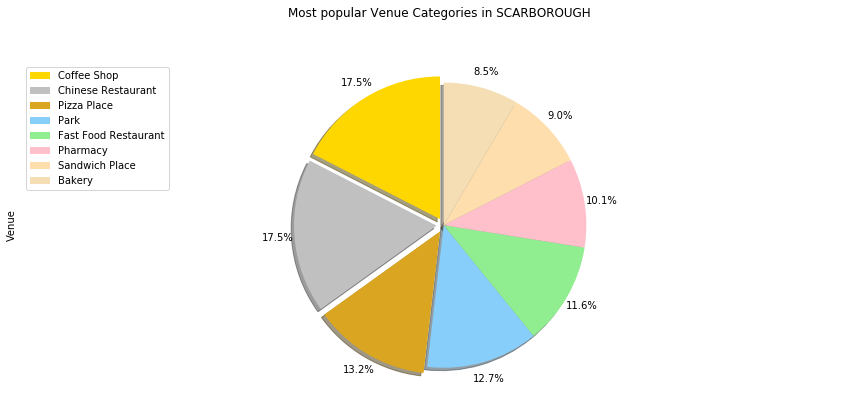

In [15]:
colors_list = ['gold', 'silver', 'goldenrod', 'lightskyblue', 'lightgreen', 'pink', 'navajowhite', 'wheat']
explode_list = [0.05, 0.05, 0.05, 0, 0, 0, 0, 0]   # ratio param for each expoded cate

scarbo_popcates.head(8).plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,     # add custom colors
                            explode=explode_list )  # 'explode' lowest 3 cates

# scale the title up by 12% to match pctdistance
plt.title('Most popular Venue Categories in SCARBOROUGH', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=scarbo_popcates.head(8).index, loc='upper left') 

plt.show()

Let's check how many **venues** (unique) and **venue categories** (unique) can be curated from all returned venues, <br> in Etobicoke.

In [16]:
num_venues_unique = len( etobi_venues['Venue'].unique() )
num_categ_unique = len( etobi_venues['Venue Category'].unique() )

print( 'Number of unique venues in Etobicoke: ', num_venues_unique, '\n')
print( 'Number of unique venue categories in Etobicoke: ', num_categ_unique, '\n') 


Number of unique venues in Etobicoke:  267 

Number of unique venue categories in Etobicoke:  110 



Let's display how many venues were returned for each neighborhood, e.g. **venue distribution in neighborhoods,** <br> in Etobicoke. 

In [12]:
etobi_venues.groupby('Neighborhood')['Venue', 'Venue Category'].count().reset_index()

,Neighborhood,Venue,Venue Category
0,"Albion Gardens, Beaumond Heights, Humbergate, ...",21,21
1,"Alderwood, Long Branch",44,44
2,"Bloordale Gardens, Eringate, Markland Wood, Ol...",31,31
3,"Cloverdale, Islington, Martin Grove, Princess ...",16,16
4,"Humber Bay Shores, Mimico South, New Toronto",25,25
5,"Humber Bay, King's Mill Park, Kingsway Park So...",20,20
6,"Kingsview Village, Martin Grove Gardens, Richv...",28,28
7,"Kingsway Park South West, Mimico NW, The Queen...",79,79
8,Northwest,9,9
9,"The Kingsway, Montgomery Road, Old Mill North",58,58


Let's display the most popular **venue categories** in Etobicoke. 

In [13]:
etobi_popcates = etobi_venues.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)
etobi_popcates.head(8)

Venue Category
Coffee Shop           27
Park                  23
Pizza Place           21
Restaurant            15
Grocery Store         12
Pharmacy              12
Italian Restaurant     9
Café                   9
Name: Venue, dtype: int64

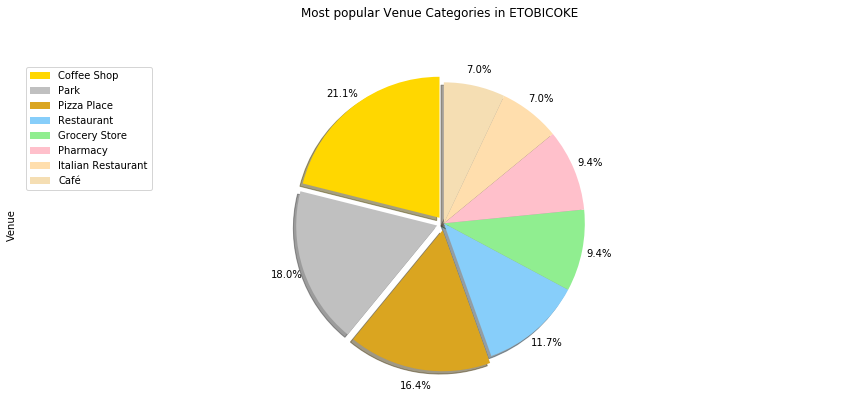

In [19]:
colors_list = ['gold', 'silver', 'goldenrod', 'lightskyblue', 'lightgreen', 'pink', 'navajowhite', 'wheat']
explode_list = [0.05, 0.05, 0.05, 0, 0, 0, 0, 0]   # ratio param for each expoded cate

etobi_popcates.head(8).plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,     # add custom colors
                            explode=explode_list )  # 'explode' lowest 3 cates

# scale the title up by 12% to match pctdistance
plt.title('Most popular Venue Categories in ETOBICOKE', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=etobi_popcates.head(8).index, loc='upper left') 

plt.show()

## All Venue Categories, Segmentation and Clustering Neighborhoods in SCARBOROUGH

#### (1) Venue Categories Grouped by Neighborhoods

In [35]:
# Uncomment the next line when Cleaning Data  
# del [ scarbo_VC ]
# del [ scarbo_grouped ]
# del [ neighborhoods_venues_sorted ]
# del [ profile ]

In [14]:
scarbo_venues['Venue Category'].loc[scarbo_venues['Venue Category'] == 'Neighborhood']

25    Neighborhood
Name: Venue Category, dtype: object

In [15]:
scarbo_venues['Venue Category'].replace('Neighborhood', 'Neighbor_hood', inplace=True)

In [16]:
scarbo_venues['Venue Category'].loc[scarbo_venues['Venue Category'] == 'Neighbor_hood']

25    Neighbor_hood
Name: Venue Category, dtype: object

Let's create a dataframe representing **132 unique categories** of venues in **Scarborough**, <br>
specifically, showing there occurrence frequencies in the **527 venue set**.

In [17]:
# create a dataframe with Dummy Variables corresponding the "Venue Category" elements
scarbo_VC = pd.get_dummies(scarbo_venues[['Venue Category']], prefix="", prefix_sep="")
scarbo_VC ;

In [18]:
scarbo_VC.describe(include='all')

,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bank,Bar,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,0.001898,0.001898,0.011385,0.003795,0.003795,0.001898,0.001898,0.030361,0.017078,0.001898,...,0.005693,0.005693,0.003795,0.003795,0.011385,0.001898,0.007590,0.001898,0.001898,0.001898
std,0.043561,0.043561,0.106193,0.061546,0.061546,0.043561,0.043561,0.171740,0.129684,0.043561,...,0.075306,0.075306,0.061546,0.061546,0.106193,0.043561,0.086873,0.043561,0.043561,0.043561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# colname = 'Bakery'         # testing purpose # 
# colname = 'Train Station'  # testing purpose # 

colname = 'Neighborhood'
if colname in scarbo_VC.columns: 
    print('this column exists in the dataframe : ', colname)
    c_ind=scarbo_VC.columns.get_loc(colname)
    print('this column index in the dataframe : ', c_ind)
    c_name = scarbo_VC.columns.to_numpy()[c_ind]
    print('double check : ', c_name)
else:
    print('There is no such column in the dataframe : ', colname)
    print('You can insert such column in the dataframe : ', colname)


There is no such column in the dataframe :  Neighborhood
You can insert such column in the dataframe :  Neighborhood


In [20]:
scarbo_VC.insert (0, 'Neighborhood', scarbo_venues['Neighborhood'])
scarbo_VC ;

Let's **group rows by neighborhood** and take the mean of the occurrences of each category.

In [21]:
scarbo_grouped = scarbo_VC.groupby('Neighborhood').mean().reset_index()
scarbo_grouped

,Neighborhood,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bank,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Agincourt,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.037037,0.018519,...,0.000000,0.000000,0.000000,0.000000,0.018519,0.000000,0.000000,0.000000,0.00000,0.000000
1,"Agincourt North, L'Amoreaux East, Milliken, St...",0.00,0.000000,0.000000,0.000000,0.00000,0.026316,0.000000,0.078947,0.000000,...,0.000000,0.000000,0.026316,0.000000,0.026316,0.000000,0.000000,0.000000,0.00000,0.000000
2,"Birch Cliff, Cliffside West",0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,Cedarbrae,0.00,0.000000,0.000000,0.023810,0.00000,0.000000,0.000000,0.071429,0.023810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.02381,0.000000
4,"Clairlea, Golden Mile, Oakridge",0.00,0.000000,0.026316,0.000000,0.00000,0.000000,0.000000,0.052632,0.026316,...,0.026316,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,"Clarks Corners, Sullivan, Tam O'Shanter",0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.020833,0.020833,...,0.000000,0.000000,0.000000,0.020833,0.041667,0.000000,0.000000,0.000000,0.00000,0.000000
6,"Cliffcrest, Cliffside, Scarborough Village West",0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,"Dorset Park, Scarborough Town Centre, Wexford ...",0.02,0.000000,0.040000,0.000000,0.02000,0.000000,0.000000,0.020000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.020000,0.000000,0.00000,0.000000
8,"East Birchmount Park, Ionview, Kennedy Park",0.00,0.000000,0.035714,0.000000,0.00000,0.000000,0.000000,0.000000,0.035714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.00000,0.000000
9,"Guildwood, Morningside, West Hill",0.00,0.000000,0.031250,0.000000,0.03125,0.000000,0.000000,0.000000,0.031250,...,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


#### (2) Cluster Neighborhoods featuring Venue Categories

In [76]:
# Uncomment the next line when Cleaning Data  
# del [ kmeans ]
# del [ data_scaled ]

We are going to cluster neighborhoods in **Scarborough** based on their similarity/dissimilarity toward venue categories. <br>
Hence, we run *k*-means to cluster the **17 neighborhoods**. <br> 
Here, the each neighborhoods is featured by **132 venue categories**. 

In [107]:
scarbo_grouped_clustering = scarbo_grouped.drop('Neighborhood', 1)
scarbo_grouped_clustering ;

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(scarbo_grouped_clustering)

In [117]:
# the function to calculate distortion for a range of number of clusters
# default tol=1e-04
#
def distortions_KMeans(X):
    distortions = []
    for i in range(1, 11):
        km = KMeans( n_clusters=i, init='k-means++', 
                   max_iter=300, tol=1e-06 )
        km.fit(X)
        distortions.append(km.inertia_) 
        
    # plot
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters') 
    plt.ylabel('Distortion') 
    plt.show()
    
    del [ km ]
    return distortions 


In [115]:
# the function to calculate distortion for a range of number of clusters
# default tol=0.0
#
def distortions_MiniBatchKMeans(X):
    distortions = []
    for i in range(1, 11):
        km = MiniBatchKMeans( n_clusters=i, init='k-means++',
                            max_iter=300, batch_size=300, tol=1e-06 )
        km.fit(X)
        distortions.append(km.inertia_) 
        
    # plot
    plt.plot(range(1, 11), distortions, marker='o')
    plt.xlabel('Number of clusters') 
    plt.ylabel('Distortion') 
    plt.show()
    
    del [ km ]
    return distortions 


In [37]:
# The Davies--Bouldin score is defined as the average ratio of intra-cluster distances to inter-cluster distances.
# Each ratio is a similarity measure of each cluster with its most similar cluster.
# Hence, clusters which are farther apart and less dispersed will result in a better score.
# The minimum score is zero, with lower values indicating better clustering.  -- A.B.


# The DBI is the average of the similarity measures of each cluster with its most similar cluster
# original algorithm and explanation:
# https://www.researchgate.net/publication/224377470_A_Cluster_Separation_Measure
#
def DaviesBouldin(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]

    # calculate cluster dispersion
    S = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    
    Ri = []
    for i in range(n_cluster):
        Rij = []
        # establish similarity between each cluster and all other clusters
        for j in range(n_cluster):
            if j != i:
                r = (S[i] + S[j]) / euclidean(centroids[i], centroids[j])
                Rij.append(r)
    # select Ri value of most similar cluster
    Ri.append(max(Rij)) 

    # get mean of all Ri values    
    dbi = np.mean(Ri)

    return dbi


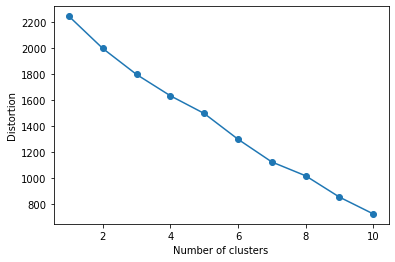

In [118]:
distortions_KMeans( data_scaled ) ;

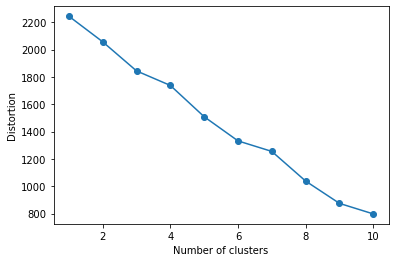

In [195]:
distortions_MiniBatchKMeans( data_scaled ) ;

Given our dataset `etobi_grouped_clustering`, we calculate "cluster inertias" (distortions) 
for the two **KMean algorithms**, classical `KMeans` and `MiniBatchKMeans`, 
versus variable number of clusters. The plotted above inertia data represent the *Elbow Method* applied to each algorithm. <br>   
We make a preference towards to `MiniBatchKMeans` algorithm rather than classical `KMeans`. <br> 
Hence, we can select **6 clusters** to cluster our dataset for **17 neighborhoods** and **132 features**. 

In [142]:
# set the number of clusters and run k-Means clustering

kclusters = 6   # 6 #

#kmeans = KMeans(n_clusters=kclusters, init='k-means++').fit(data_scaled)
#kmeans = MiniBatchKMeans(n_clusters=kclusters, init='k-means++').fit(data_scaled)

kmeans = MiniBatchKMeans(n_clusters=kclusters, init='k-means++', 
                         max_iter=300, batch_size=300, tol=1e-06).fit(data_scaled)


In [143]:
kmeans

MiniBatchKMeans(batch_size=300, compute_labels=True, init='k-means++',
        init_size=None, max_iter=300, max_no_improvement=10, n_clusters=6,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=1e-06,
        verbose=0)

In [144]:
# check out the cluster labels (generated for each neigborhood)
kmeans.labels_[:]

array([5, 3, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 4, 0, 0, 2], dtype=int32)

In [145]:
# check out the center of the clusters (centroid coordinates)
# kmeans.cluster_centers_

In [146]:
# print the measure, Inertia
print( kmeans.inertia_ )  


1345.5798301900359


In [148]:

import warnings
warnings.filterwarnings("ignore")
#
# print the measure, Davies_Bouldin_score
#
from sklearn.metrics import davies_bouldin_score # a metric to measure the cluster similarity
print( davies_bouldin_score( data_scaled, kmeans.labels_ ) )    # a few RuntimeWarnings
#
from scipy.spatial.distance import pdist, euclidean 
print( DaviesBouldin( data_scaled, kmeans.labels_ ) )           # no RuntimeWarnings


1.3726911203515917
0.6705810466560393


#### (3) Top 10 Venue Categories (SORTED) in each neighborhood

Let's create the dataframe with **top 10 venue categories** for each neighborhood.

In [22]:
# the function to sort the venues in decending order
#
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [23]:
# the function to make a dataframe with top popular venues sorted in decending order
#
def make_neighborhoods_venues_sorted(num_top_venues, dist_grouped):
    #
    # INPUT:
    # num_top_venues (integer)-- the number of top popular venues.
    # dist_grouped (dataframe) -- "scarbo_grouped", "etobi_grouped", 
    # all venues collected in the district (borough) and grouped by neighborhoods.
    
    indicators = ['st','nd','rd','th','th','th','th','th','th','th']
    # np.arange(10) -->  array([ 0,1,2,3,4,5,6,7,8,9 ])
    
    # create "columns" according to "num_top_venues"
    columns = ['Neighborhood']
    for ind in np.arange(num_top_venues):
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind])) 
    
    # create "neighborhoods_venues_sorted" as a dataframe 
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns) 
    neighborhoods_venues_sorted['Neighborhood'] = dist_grouped['Neighborhood'] 
    
    # populate "neighborhoods_venues_sorted" according to "dist_grouped.shape[0]", e.g. number of rows 
    num_nei=dist_grouped.shape[0]
    for ind in np.arange(num_nei): 
        neighborhoods_venues_sorted.iloc[ind,1:] = return_most_common_venues(dist_grouped.iloc[ind,:],num_top_venues) 
        
    # print( "shape: ", neighborhoods_venues_sorted.shape, '\n' )
    
    return  neighborhoods_venues_sorted


In [102]:

# set the number of features
#
num_top_venues = 10  # 10 #

# make a dataframe with top popular venues sorted in decending order
#
neighborhoods_venues_sorted = make_neighborhoods_venues_sorted( num_top_venues, scarbo_grouped )

neighborhoods_venues_sorted


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Shopping Mall,Park,Pizza Place,Bakery,Caribbean Restaurant,Filipino Restaurant,Bubble Tea Shop,Noodle House,Pool Hall
1,"Agincourt North, L'Amoreaux East, Milliken, St...",Chinese Restaurant,Bubble Tea Shop,Dessert Shop,Korean Restaurant,Bakery,Pizza Place,Coffee Shop,Park,Malay Restaurant,Dumpling Restaurant
2,"Birch Cliff, Cliffside West",Park,Skating Rink,Ice Cream Shop,Café,Restaurant,Chinese Restaurant,Thai Restaurant,General Entertainment,Diner,Dessert Shop
3,Cedarbrae,Coffee Shop,Bakery,Gas Station,Pharmacy,Sandwich Place,Indian Restaurant,Wings Joint,Lounge,Chinese Restaurant,Music Store
4,"Clairlea, Golden Mile, Oakridge",Intersection,Park,Coffee Shop,Bus Station,Bakery,Bus Line,Grocery Store,Pharmacy,Fast Food Restaurant,Filipino Restaurant
5,"Clarks Corners, Sullivan, Tam O'Shanter",Fast Food Restaurant,Coffee Shop,Park,Intersection,Sandwich Place,Vietnamese Restaurant,Shopping Mall,Deli / Bodega,Caribbean Restaurant,Pharmacy
6,"Cliffcrest, Cliffside, Scarborough Village West",Park,Harbor / Marina,Ice Cream Shop,Discount Store,Pizza Place,Beach,Burger Joint,Hardware Store,Fast Food Restaurant,Liquor Store
7,"Dorset Park, Scarborough Town Centre, Wexford ...",Coffee Shop,Restaurant,Fast Food Restaurant,Indian Restaurant,Park,Electronics Store,Pizza Place,Asian Restaurant,Furniture / Home Store,Pharmacy
8,"East Birchmount Park, Ionview, Kennedy Park",Coffee Shop,Chinese Restaurant,Discount Store,Grocery Store,Fast Food Restaurant,Bus Line,Burger Joint,Sporting Goods Shop,Pharmacy,Pizza Place
9,"Guildwood, Morningside, West Hill",Pizza Place,Breakfast Spot,Coffee Shop,Fast Food Restaurant,Pharmacy,Shopping Mall,Sandwich Place,Restaurant,Juice Bar,Gym / Fitness Center


In [25]:
print( "shape: ", neighborhoods_venues_sorted.shape, '\n' )

shape:  (17, 11) 



Let's correct values for 2 neighborhoods having **poor venue statistics**, <br>
"Upper Rouge" (1 unique Venues of 10; 1 unique Venue Categories instead of 10), <br> 
"Highland Creek, Rouge Hill, Port Union" (7 unique Venues of 10; 7 unique Venue Categories instead of 10).

In [103]:
valu_neigh = "Upper Rouge"
scarbo_venues.query('Neighborhood == @valu_neigh') 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
526,Upper Rouge,43.836125,-79.205636,Beige-ville,5233006511d296849550ec7a,43.8451,-79.208755,Donut Shop


In [104]:
valu_neigh = "Highland Creek, Rouge Hill, Port Union"
scarbo_venues.query('Neighborhood == @valu_neigh') 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
22,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Shamrock Burgers,4b96e31cf964a5207deb34e3,43.783823,-79.168406,Burger Joint
23,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Fratelli Village Pizzeria,4bccf9bf511f9521ce0eb4c7,43.784008,-79.169787,Italian Restaurant
24,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Ted's Restaurant,4be6c179d4f7c9b665042720,43.784468,-79.169200,Breakfast Spot
25,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Highland Creek,4fcba458754a63325ee554c4,43.790281,-79.173703,Neighbor_hood
26,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Colonel Danforth Park,4c38d4ab18e72d7fb01d19f5,43.777507,-79.164303,Playground
27,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Centennial Park,51d49879498e5a95b798fa8a,43.786257,-79.148776,Park
28,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,BOSS Fitness,5073a4cfe4b035a218568e0d,43.794778,-79.158506,Gym / Fitness Center


In [105]:

neig15 = "Upper Rouge"
vencat15 = "Donut Shop"
neighborhoods_venues_sorted.replace( neighborhoods_venues_sorted.iloc[15,1:11], vencat15, inplace=True) 

neigh10 = "Highland Creek, Rouge Hill, Port Union"
vencat10 = "Breakfast Spot"
neighborhoods_venues_sorted.replace( neighborhoods_venues_sorted.iloc[10,8:11], vencat10, inplace=True) 


In [106]:
neighborhoods_venues_sorted.iloc[ [10, 15], : ]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,"Highland Creek, Rouge Hill, Port Union",Burger Joint,Italian Restaurant,Neighbor_hood,Playground,Breakfast Spot,Park,Gym / Fitness Center,Breakfast Spot,Breakfast Spot,Breakfast Spot
15,Upper Rouge,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop


In [26]:
# generate the report -- we take the data for Correlation Analysis
profile = ProfileReport(neighborhoods_venues_sorted, title='top_10_scarbo', html={'style':{'full_width':True}})

In [32]:
# display the report in the Jupyter Notebook
# profile.to_widgets()

In [31]:
# include report in the Jupyter Notebook
# profile.to_notebook_iframe() 

In [27]:
# write the report into the HTML-file
profile.to_file(output_file="top_10_scarbo.html")

#### (4) Visualize Neighborhoods' Clusters (from 0 to 5)

In [70]:
# Uncomment the next line when Cleaning Data  
# del [ scarbo_merged ]

Let's create the dataframe that includes neighborhoods with <br> their **borough, names, geo-coordinates, cluster labels** next to their **top 10 venue categories**. <br>
We are going to use it further for neighborhood clusters' visualization.  

In [149]:
# merge neighborhoods "venue-categories" (grouped) with neighborhoods "geo-data" (grouped)
#
# scarbo_data:                  PostalCode, Borough, Neighborhood, Latitude, Longitude
# neighborhoods_venues_sorted:  Neighborhood, 1st, 2nd, ... 10th  # 10th #
# kmeans.labels_ :              Cluster Labels    # array #
#
col_names =  ['Borough', 'Neighborhood','Latitude','Longitude','Cluster Labels']
scarbo_merged = pd.DataFrame(columns = col_names)
#
scarbo_merged[['Borough', 'Neighborhood']] = scarbo_data[['Borough', 'Neighborhood']] 
scarbo_merged[['Latitude', 'Longitude']] = scarbo_data[['Latitude', 'Longitude']] 
scarbo_merged = scarbo_merged.sort_values(by=['Neighborhood']).reset_index(drop=True)
#
scarbo_merged['Cluster Labels'] = pd.DataFrame( {'Cluster Labels': kmeans.labels_ } )
scarbo_merged = scarbo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
scarbo_merged


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,Agincourt,43.794200,-79.262029,5,Chinese Restaurant,Shopping Mall,Park,Pizza Place,Bakery,Caribbean Restaurant,Filipino Restaurant,Bubble Tea Shop,Noodle House,Pool Hall
1,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",43.815252,-79.284577,3,Chinese Restaurant,Bubble Tea Shop,Dessert Shop,Korean Restaurant,Bakery,Pizza Place,Coffee Shop,Park,Malay Restaurant,Dumpling Restaurant
2,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0,Park,Skating Rink,Ice Cream Shop,Café,Restaurant,Chinese Restaurant,Thai Restaurant,General Entertainment,Diner,Dessert Shop
3,Scarborough,Cedarbrae,43.773136,-79.239476,2,Coffee Shop,Bakery,Gas Station,Pharmacy,Sandwich Place,Indian Restaurant,Wings Joint,Lounge,Chinese Restaurant,Music Store
4,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,0,Intersection,Park,Coffee Shop,Bus Station,Bakery,Bus Line,Grocery Store,Pharmacy,Fast Food Restaurant,Filipino Restaurant
5,Scarborough,"Clarks Corners, Sullivan, Tam O'Shanter",43.781638,-79.304302,2,Fast Food Restaurant,Coffee Shop,Park,Intersection,Sandwich Place,Vietnamese Restaurant,Shopping Mall,Deli / Bodega,Caribbean Restaurant,Pharmacy
6,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,0,Park,Harbor / Marina,Ice Cream Shop,Discount Store,Pizza Place,Beach,Burger Joint,Hardware Store,Fast Food Restaurant,Liquor Store
7,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304,1,Coffee Shop,Restaurant,Fast Food Restaurant,Indian Restaurant,Park,Electronics Store,Pizza Place,Asian Restaurant,Furniture / Home Store,Pharmacy
8,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,0,Coffee Shop,Chinese Restaurant,Discount Store,Grocery Store,Fast Food Restaurant,Bus Line,Burger Joint,Sporting Goods Shop,Pharmacy,Pizza Place
9,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,Pizza Place,Breakfast Spot,Coffee Shop,Fast Food Restaurant,Pharmacy,Shopping Mall,Sandwich Place,Restaurant,Juice Bar,Gym / Fitness Center


In [150]:
print( "shape: ", scarbo_merged.shape, '\n' )

shape:  (17, 15) 



In [ ]:
# Write pandas DataFrame to the csv-file
scarbo_merged.to_csv('scarbo_clusters_winter.csv', sep=',', index=True)

# Read csv-file into pandas DataFrame
scarbo_merged = pd.read_csv('scarbo_clusters_winter.csv', header=0)


Finally, let's visualize the resulting **neighborhood clusters**.

In [151]:
# The geograpical coordinate of SCARBOROUGH, ON
[latitude, longitude ] = [ 43.773077, -79.257774]

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(scarbo_merged['Latitude'], scarbo_merged['Longitude'], scarbo_merged['Neighborhood'], scarbo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker( 
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7 ).add_to(map_clusters) 

map_clusters

NOTE. <br>
Here, *Folium* added **17 Circle Markers** to the map of **Scarborough**. <br> 
By request, we can report the order of markers' appearance on the map, following the **Marker Label** and **Marker Color.** <br>

#### (5) Examine Neighborhood' Clusters (from 0 to 5)

Let's examine each cluster and determine the discriminating venue categories that distinguish each cluster. <br> 
Based on the defining categories, we can even assign a name to each cluster. <br>

In [152]:
# Write pandas DataFrame to the csv-file
scarbo_merged.to_csv('scarbo_clusters_winter.csv', sep=',', index=True)

#### Cluster 0

In [153]:
scarbo_merged.loc[scarbo_merged['Cluster Labels'] == 0, scarbo_merged.columns[[1] + list(range(5, scarbo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Birch Cliff, Cliffside West",Park,Skating Rink,Ice Cream Shop,Café,Restaurant,Chinese Restaurant,Thai Restaurant,General Entertainment,Diner,Dessert Shop
4,"Clairlea, Golden Mile, Oakridge",Intersection,Park,Coffee Shop,Bus Station,Bakery,Bus Line,Grocery Store,Pharmacy,Fast Food Restaurant,Filipino Restaurant
6,"Cliffcrest, Cliffside, Scarborough Village West",Park,Harbor / Marina,Ice Cream Shop,Discount Store,Pizza Place,Beach,Burger Joint,Hardware Store,Fast Food Restaurant,Liquor Store
8,"East Birchmount Park, Ionview, Kennedy Park",Coffee Shop,Chinese Restaurant,Discount Store,Grocery Store,Fast Food Restaurant,Bus Line,Burger Joint,Sporting Goods Shop,Pharmacy,Pizza Place
9,"Guildwood, Morningside, West Hill",Pizza Place,Breakfast Spot,Coffee Shop,Fast Food Restaurant,Pharmacy,Shopping Mall,Sandwich Place,Restaurant,Juice Bar,Gym / Fitness Center
10,"Highland Creek, Rouge Hill, Port Union",Burger Joint,Italian Restaurant,Neighbor_hood,Playground,Breakfast Spot,Park,Gym / Fitness Center,Breakfast Spot,Breakfast Spot,Breakfast Spot
12,"Maryvale, Wexford",Middle Eastern Restaurant,Pizza Place,Grocery Store,Intersection,Hookah Bar,Bus Station,Chinese Restaurant,Sandwich Place,Breakfast Spot,Fish Market
14,Scarborough Village,Sandwich Place,Pharmacy,Ice Cream Shop,Beer Store,Fish & Chips Shop,Liquor Store,Bus Station,Pizza Place,Breakfast Spot,Bowling Alley
15,Upper Rouge,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop,Donut Shop


#### Cluster 1

In [154]:
scarbo_merged.loc[scarbo_merged['Cluster Labels'] == 1, scarbo_merged.columns[[1] + list(range(5, scarbo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"Dorset Park, Scarborough Town Centre, Wexford ...",Coffee Shop,Restaurant,Fast Food Restaurant,Indian Restaurant,Park,Electronics Store,Pizza Place,Asian Restaurant,Furniture / Home Store,Pharmacy


#### Cluster 2

In [155]:
scarbo_merged.loc[scarbo_merged['Cluster Labels'] == 2, scarbo_merged.columns[[1] + list(range(5, scarbo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Cedarbrae,Coffee Shop,Bakery,Gas Station,Pharmacy,Sandwich Place,Indian Restaurant,Wings Joint,Lounge,Chinese Restaurant,Music Store
5,"Clarks Corners, Sullivan, Tam O'Shanter",Fast Food Restaurant,Coffee Shop,Park,Intersection,Sandwich Place,Vietnamese Restaurant,Shopping Mall,Deli / Bodega,Caribbean Restaurant,Pharmacy
11,L'Amoreaux West,Chinese Restaurant,Pizza Place,Coffee Shop,Fast Food Restaurant,Pharmacy,Sandwich Place,Bakery,Intersection,Pool,Discount Store
16,Woburn,Park,Department Store,Coffee Shop,Pizza Place,Indian Restaurant,Supermarket,Pharmacy,Chinese Restaurant,Discount Store,Sandwich Place


#### Cluster 3

In [156]:
scarbo_merged.loc[scarbo_merged['Cluster Labels'] == 3, scarbo_merged.columns[[1] + list(range(5, scarbo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Agincourt North, L'Amoreaux East, Milliken, St...",Chinese Restaurant,Bubble Tea Shop,Dessert Shop,Korean Restaurant,Bakery,Pizza Place,Coffee Shop,Park,Malay Restaurant,Dumpling Restaurant


#### Cluster 4

In [157]:
scarbo_merged.loc[scarbo_merged['Cluster Labels'] == 4, scarbo_merged.columns[[1] + list(range(5, scarbo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"Rouge, Malvern",Fast Food Restaurant,Trail,Zoo Exhibit,Restaurant,Arts & Crafts Store,Big Box Store,Business Service,Caribbean Restaurant,Chinese Restaurant,Coffee Shop


#### Cluster 5

In [158]:
scarbo_merged.loc[scarbo_merged['Cluster Labels'] == 5, scarbo_merged.columns[[1] + list(range(5, scarbo_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Shopping Mall,Park,Pizza Place,Bakery,Caribbean Restaurant,Filipino Restaurant,Bubble Tea Shop,Noodle House,Pool Hall


#### COMMENTARIES

After **grouping** by "Neighborhood" (we need that for cluster analysis) 
their index set has been changed. <br>

The **correspondence** between the new index value of a neighborhood and its previous index value 
is shown below. 

index_nei_2 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

index_nei_1 : [12, 14, 9, 4, 7, 13, 8, 10, 6, 2, 1, 15, 11, 0, 5, 16, 3]
    

#### (6) Frequencies of Top 10 Venue Categories in each neighborhood

Let's print the **top 10 venue categories** along with their frequencies for each neighborhood.

In [191]:
# set the number of features
#
num_top_venues = 10   # 10 #

arra=[]
    
for hood in scarbo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = scarbo_grouped[scarbo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    arra.append( [hood, temp.loc[temp['freq'].idxmax()].values.tolist(), "xxx"] )
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
# arra:  list of the most popular venue categories in all neighborhoods
# arra:  test column with 'xxx' is the last one
# arra


----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.17
1         Shopping Mall  0.07
2                  Park  0.06
3  Caribbean Restaurant  0.04
4   Filipino Restaurant  0.04
5           Pizza Place  0.04
6                Bakery  0.04
7   Shanghai Restaurant  0.02
8          Noodle House  0.02
9        Clothing Store  0.02


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                venue  freq
0  Chinese Restaurant  0.13
1     Bubble Tea Shop  0.11
2              Bakery  0.08
3        Dessert Shop  0.08
4   Korean Restaurant  0.08
5                Park  0.05
6         Pizza Place  0.05
7         Coffee Shop  0.05
8                 Gym  0.03
9       Grocery Store  0.03


----Birch Cliff, Cliffside West----
                   venue  freq
0                   Park  0.14
1         Ice Cream Shop  0.07
2             Restaurant  0.07
3  General Entertainment  0.07
4     Chinese Restaurant  0.07
5        Thai Restaurant  0.07
6                    G

## All Venue Categories, Segmentation and Clustering Neighborhoods in ETOBICOKE

#### (1) Venue Categories Grouped by Neighborhoods

In [36]:
# Uncomment the next line when Cleaning Data  
# del [ etobi_VC ]
# del [ etobi_grouped ]
# del [ neighborhoods_venues_sorted ]
# del [profile]

In [73]:
etobi_venues['Venue Category'].loc[etobi_venues['Venue Category'] == 'Neighborhood']

Series([], Name: Venue Category, dtype: object)

In [74]:
etobi_venues['Venue Category'].replace('Neighborhood', 'Neighbor_hood', inplace=True)

In [75]:
etobi_venues['Venue Category'].loc[etobi_venues['Venue Category'] == 'Neighbor_hood']

Series([], Name: Venue Category, dtype: object)

Let's create a dataframe representing **110 unique categories** of venues in **Etobicoke**, <br>
specifically, showing there occurrence frequencies in the **363 venue set**.

In [76]:
# create a dataframe with Dummy Variables corresponding the "Venue Category" elements
etobi_VC = pd.get_dummies(etobi_venues[['Venue Category']], prefix="", prefix_sep="")
etobi_VC ;

In [77]:
etobi_VC.describe(include='all')

,American Restaurant,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Store,Breakfast Spot,...,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Transportation Service,Video Store,Wings Joint,Yoga Studio
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,0.005510,0.005510,0.005510,0.002755,0.013774,0.022039,0.005510,0.008264,0.013774,0.013774,...,0.002755,0.008264,0.002755,0.002755,0.005510,0.002755,0.002755,0.002755,0.002755,0.005510
std,0.074124,0.074124,0.074124,0.052486,0.116713,0.147012,0.074124,0.090658,0.116713,0.116713,...,0.052486,0.090658,0.052486,0.052486,0.074124,0.052486,0.052486,0.052486,0.052486,0.074124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
# colname = 'Bakery'         # testing purpose # 
# colname = 'Train Station'  # testing purpose # 

colname = 'Neighborhood'
if colname in etobi_VC.columns: 
    print('this column exists in the dataframe : ', colname)
    c_ind=etobi_VC.columns.get_loc(colname)
    print('this column index in the dataframe : ', c_ind)
    c_name = etobi_VC.columns.to_numpy()[c_ind]
    print('double check : ', c_name)
else:
    print('There is no such column in the dataframe : ', colname)
    print('You can insert such column in the dataframe : ', colname)


There is no such column in the dataframe :  Neighborhood
You can insert such column in the dataframe :  Neighborhood


In [79]:
etobi_VC.insert (0, 'Neighborhood', etobi_venues['Neighborhood'])
etobi_VC ; 

Let's **group rows by neighborhood** and take the mean of the occurrences of each category.

In [80]:
etobi_grouped = etobi_VC.groupby('Neighborhood').mean().reset_index()
etobi_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Beer Store,...,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Transportation Service,Video Store,Wings Joint,Yoga Studio
0,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000
1,"Alderwood, Long Branch",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,0.022727,...,0.000000,0.000000,0.0000,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Bloordale Gardens, Eringate, Markland Wood, Ol...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.064516,0.032258,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000
3,"Cloverdale, Islington, Martin Grove, Princess ...",0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Humber Bay Shores, Mimico South, New Toronto",0.000000,0.000000,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Humber Bay, King's Mill Park, Kingsway Park So...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.050000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Kingsview Village, Martin Grove Gardens, Richv...",0.035714,0.035714,0.000000,0.000000,0.000000,0.071429,0.000000,0.035714,0.071429,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Kingsway Park South West, Mimico NW, The Queen...",0.000000,0.012658,0.025316,0.012658,0.025316,0.025316,0.012658,0.000000,0.000000,...,0.000000,0.012658,0.0000,0.012658,0.000000,0.000000,0.000000,0.000000,0.012658,0.025316
8,Northwest,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"The Kingsway, Montgomery Road, Old Mill North",0.017241,0.000000,0.000000,0.000000,0.017241,0.017241,0.000000,0.000000,0.000000,...,0.017241,0.017241,0.0000,0.000000,0.017241,0.017241,0.000000,0.000000,0.000000,0.000000


#### (2) Cluster Neighborhoods featuring Venue Categories

In [86]:
# Uncomment the next line when Cleaning Data  
# del [ kmeans ]
# del [ data_scaled ]

We are going to cluster neighborhoods in **Etobicoke** based on their similarity/dissimilarity toward venue categories. <br>
Hence, we run *k*-means to cluster the **11 neighborhoods**. <br> 
Here, the each neighborhoods is featured by **110 venue categories**. 

In [164]:
etobi_grouped_clustering = etobi_grouped.drop('Neighborhood', 1)
etobi_grouped_clustering ;

In [206]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(etobi_grouped_clustering)

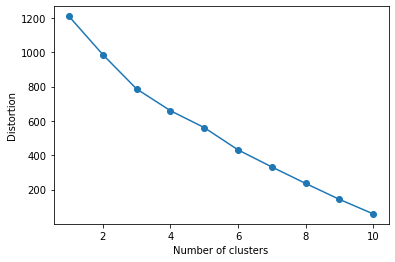

In [166]:
distortions_KMeans( data_scaled ) ;

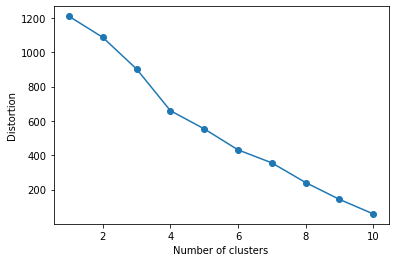

In [212]:
distortions_MiniBatchKMeans( data_scaled ) ;

Given our dataset `etobi_grouped_clustering`, we calculate "cluster inertias" (distortions) 
for the two **KMean algorithms**, classical `KMeans` and `MiniBatchKMeans`, 
versus variable number of clusters. The plotted above inertia data represent the *Elbow Method* applied to each algorithm. <br>   
We make a preference towards to `MiniBatchKMeans` algorithm rather than classical `KMeans`. <br> 
Hence, we can select **6 clusters** to cluster our dataset for **11 neighborhoods** and **110 features**. 

In [174]:
# set the number of clusters and run k-Means clustering

kclusters = 6   # 6 #

#kmeans = KMeans(n_clusters=kclusters, init='k-means++').fit(data_scaled)
#kmeans = MiniBatchKMeans(n_clusters=kclusters, init='k-means++').fit(data_scaled)

kmeans = MiniBatchKMeans(n_clusters=kclusters, init='k-means++', 
                         max_iter=300, batch_size=300, tol=1e-06).fit(data_scaled)


In [175]:
kmeans

MiniBatchKMeans(batch_size=300, compute_labels=True, init='k-means++',
        init_size=None, max_iter=300, max_no_improvement=10, n_clusters=6,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=1e-06,
        verbose=0)

In [176]:
# check out the cluster labels (generated for each neigborhood)
kmeans.labels_[:]

array([4, 5, 2, 5, 5, 5, 2, 3, 1, 5, 0], dtype=int32)

In [177]:
# check out the center of the clusters (centroid coordinates)
# kmeans.cluster_centers_

In [178]:
# print the measure, Inertia
print( kmeans.inertia_ )  


543.5253570718445


In [180]:

import warnings
warnings.filterwarnings("ignore")
#
# print the measure, Davies_Bouldin_score
#
from sklearn.metrics import davies_bouldin_score # a metric to measure the cluster similarity
print( davies_bouldin_score( data_scaled, kmeans.labels_ ) )    # a few RuntimeWarnings
#
from scipy.spatial.distance import pdist, euclidean 
print( DaviesBouldin( data_scaled, kmeans.labels_ ) )           # no RuntimeWarnings


1.0763676373270672
1.685112089902787


#### (3) Top 10 Venue Categories (SORTED) in each neighborhood

Let's create the dataframe with **top 10 venue categories** for each neighborhood.

In [159]:

# set the number of features
#
num_top_venues = 10  # 10 #

# make a dataframe with top popular venues sorted in decending order
#
neighborhoods_venues_sorted = make_neighborhoods_venues_sorted( num_top_venues, etobi_grouped )

neighborhoods_venues_sorted


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Albion Gardens, Beaumond Heights, Humbergate, ...",Pizza Place,Grocery Store,Bus Line,Indian Restaurant,Fried Chicken Joint,Fast Food Restaurant,Park,Pharmacy,Gym Pool,Sandwich Place
1,"Alderwood, Long Branch",Pharmacy,Coffee Shop,Park,Pizza Place,Discount Store,Grocery Store,Light Rail Station,Convenience Store,Gas Station,Pub
2,"Bloordale Gardens, Eringate, Markland Wood, Ol...",Convenience Store,Pizza Place,Park,Café,Coffee Shop,Pet Store,Baseball Field,Liquor Store,Fish & Chips Shop,Shopping Mall
3,"Cloverdale, Islington, Martin Grove, Princess ...",Park,Pizza Place,Hotel,Pharmacy,Gym,Grocery Store,Bank,Theater,Fish & Chips Shop,Breakfast Spot
4,"Humber Bay Shores, Mimico South, New Toronto",Park,Pharmacy,Café,Indian Restaurant,Italian Restaurant,Fried Chicken Joint,Liquor Store,Fast Food Restaurant,Mexican Restaurant,Dessert Shop
5,"Humber Bay, King's Mill Park, Kingsway Park So...",Coffee Shop,Italian Restaurant,Park,Sushi Restaurant,Fast Food Restaurant,Harbor / Marina,Sandwich Place,Ice Cream Shop,Pizza Place,Thai Restaurant
6,"Kingsview Village, Martin Grove Gardens, Richv...",Pharmacy,Liquor Store,Bank,Pizza Place,Beer Store,Coffee Shop,Sandwich Place,Shopping Mall,Café,Gas Station
7,"Kingsway Park South West, Mimico NW, The Queen...",Restaurant,Coffee Shop,Grocery Store,Burrito Place,Sushi Restaurant,Gym,Gym / Fitness Center,Italian Restaurant,Convenience Store,Park
8,Northwest,Coffee Shop,Hotel,Mediterranean Restaurant,Drugstore,Rental Car Location,Restaurant,Dog Run,Gym,Greek Restaurant,Fish & Chips Shop
9,"The Kingsway, Montgomery Road, Old Mill North",Park,Coffee Shop,French Restaurant,Sushi Restaurant,Burger Joint,Breakfast Spot,Spa,Liquor Store,Pizza Place,Pub


In [160]:
print( "shape: ", neighborhoods_venues_sorted.shape, '\n' )

shape:  (11, 11) 



Let's correct values for 1 neighborhood having **poor venue statistics**, <br>
"Northwest" (9 unique Venues of 10; 8 unique Venue Categories instead of 10)

In [161]:
valu_neigh = "Northwest"
etobi_venues.query('Neighborhood == @valu_neigh') 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
354,Northwest,43.706748,-79.594054,Tim Hortons,4be452122457a593c40eaa15,43.714657,-79.593716,Coffee Shop
355,Northwest,43.706748,-79.594054,Xawaash,561d7a54498ed5c87ce4159d,43.715786,-79.593053,Mediterranean Restaurant
356,Northwest,43.706748,-79.594054,Tim Hortons,4fa6633be4b028d55ab6d0c6,43.714866,-79.604687,Coffee Shop
357,Northwest,43.706748,-79.594054,Saand Rexdale,4da741691e725f12297f3a53,43.705072,-79.598725,Drugstore
358,Northwest,43.706748,-79.594054,Woodbine Hotel & Suites,4fa3ca28e4b05ddd65da97ae,43.712624,-79.592664,Hotel
359,Northwest,43.706748,-79.594054,Toronto Pearson International Airport Pet Park,53c181eb498eb5bf28f6ab80,43.704901,-79.604441,Dog Run
360,Northwest,43.706748,-79.594054,Enterprise Rent-A-Car,4d764ad4f5e4b1f7b07e0187,43.715260,-79.589320,Rental Car Location
361,Northwest,43.706748,-79.594054,Fitness Two 4,4dadba464df0522cc5608a66,43.714482,-79.582903,Gym
362,Northwest,43.706748,-79.594054,Post Parade Dining Room,5174132ae4b0d069bec3e724,43.715040,-79.604529,Restaurant


In [162]:

eneig8 = "Northwest"
evencat8 = "Drugstore"
neighborhoods_venues_sorted.replace( neighborhoods_venues_sorted.iloc[8,9:11], evencat8, inplace=True) 


In [163]:
neighborhoods_venues_sorted.iloc[ [ 8 ], : ]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Northwest,Coffee Shop,Hotel,Mediterranean Restaurant,Drugstore,Rental Car Location,Restaurant,Dog Run,Gym,Drugstore,Drugstore


In [41]:
# generate the report -- we take the data for Correlation Analysis
profile = ProfileReport(neighborhoods_venues_sorted, title='top_10_etobi', html={'style':{'full_width':True}})

In [32]:
# display the report in the Jupyter Notebook
# profile.to_widgets()

In [31]:
# include report in the Jupyter Notebook
# profile.to_notebook_iframe() 

In [42]:
# write the report into the HTML-file
profile.to_file(output_file="top_10_etobi.html")

#### (4) Visualize Neighborhoods' Clusters (from 0 to 5)

In [ ]:
# Uncomment the next line when Cleaning Data  
# del [ etobi_merged ]

Let's create the dataframe that includes neighborhoods with <br> their **borough, names, geo-coordinates, cluster labels** next to their **top 10 venue categories**. <br>
We are going to use it further for neighborhood clusters' visualization.  

In [181]:
# merge neighborhoods "venue-categories" (grouped) with neighborhoods "geo-data" (grouped)
#
# etobi_data:                   PostalCode, Borough, Neighborhood, Latitude, Longitude
# neighborhoods_venues_sorted:  Neighborhood, 1st, 2nd, ... 10th  # 10th #
# kmeans.labels_ :              Cluster Labels    # array #
#
col_names =  ['Borough', 'Neighborhood','Latitude','Longitude','Cluster Labels']
etobi_merged = pd.DataFrame(columns = col_names)
#
etobi_merged[['Borough', 'Neighborhood']] = etobi_data[['Borough', 'Neighborhood']] 
etobi_merged[['Latitude', 'Longitude']] = etobi_data[['Latitude', 'Longitude']] 
etobi_merged = etobi_merged.sort_values(by=['Neighborhood']).reset_index(drop=True)
#
etobi_merged['Cluster Labels'] = pd.DataFrame( {'Cluster Labels': kmeans.labels_ } )
etobi_merged = etobi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
etobi_merged


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,4,Pizza Place,Grocery Store,Bus Line,Indian Restaurant,Fried Chicken Joint,Fast Food Restaurant,Park,Pharmacy,Gym Pool,Sandwich Place
1,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,5,Pharmacy,Coffee Shop,Park,Pizza Place,Discount Store,Grocery Store,Light Rail Station,Convenience Store,Gas Station,Pub
2,Etobicoke,"Bloordale Gardens, Eringate, Markland Wood, Ol...",43.643515,-79.577201,2,Convenience Store,Pizza Place,Park,Café,Coffee Shop,Pet Store,Baseball Field,Liquor Store,Fish & Chips Shop,Shopping Mall
3,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724,5,Park,Pizza Place,Hotel,Pharmacy,Gym,Grocery Store,Bank,Theater,Fish & Chips Shop,Breakfast Spot
4,Etobicoke,"Humber Bay Shores, Mimico South, New Toronto",43.605647,-79.501321,5,Park,Pharmacy,Café,Indian Restaurant,Italian Restaurant,Fried Chicken Joint,Liquor Store,Fast Food Restaurant,Mexican Restaurant,Dessert Shop
5,Etobicoke,"Humber Bay, King's Mill Park, Kingsway Park So...",43.636258,-79.498509,5,Coffee Shop,Italian Restaurant,Park,Sushi Restaurant,Fast Food Restaurant,Harbor / Marina,Sandwich Place,Ice Cream Shop,Pizza Place,Thai Restaurant
6,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,2,Pharmacy,Liquor Store,Bank,Pizza Place,Beer Store,Coffee Shop,Sandwich Place,Shopping Mall,Café,Gas Station
7,Etobicoke,"Kingsway Park South West, Mimico NW, The Queen...",43.628841,-79.520999,3,Restaurant,Coffee Shop,Grocery Store,Burrito Place,Sushi Restaurant,Gym,Gym / Fitness Center,Italian Restaurant,Convenience Store,Park
8,Etobicoke,Northwest,43.706748,-79.594054,1,Coffee Shop,Hotel,Mediterranean Restaurant,Drugstore,Rental Car Location,Restaurant,Dog Run,Gym,Drugstore,Drugstore
9,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,5,Park,Coffee Shop,French Restaurant,Sushi Restaurant,Burger Joint,Breakfast Spot,Spa,Liquor Store,Pizza Place,Pub


In [182]:
print( "shape: ", etobi_merged.shape, '\n' )

shape:  (11, 15) 



In [ ]:
# Write pandas DataFrame to the csv-file
etobi_merged.to_csv('etobi_clusters_winter.csv', sep=',', index=True)

# Read csv-file into pandas DataFrame
etobi_merged = pd.read_csv('etobi_clusters_winter.csv', header=0)


Finally, let's visualize the resulting **neighborhood clusters**.

In [183]:
# The geograpical coordinate of ETOBICOKE, ON
[latitude, longitude ] = [ 43.671459, -79.552492]

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(etobi_merged['Latitude'], etobi_merged['Longitude'], etobi_merged['Neighborhood'], etobi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker( 
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7 ).add_to(map_clusters) 

map_clusters

NOTE. <br>
Here, *Folium* added **11 Circle Markers** to the map of **Etobicoke**. <br> 
By request, we can report the order of markers' appearance on the map, following the **Marker Label** and **Marker Color.** <br>

#### (5) Examine Neighborhood' Clusters (from 0 to 5)

Let's examine each cluster and determine the discriminating venue categories that distinguish each cluster. <br> 
Based on the defining categories, we can even assign a name to each cluster. <br>

In [184]:
# Write pandas DataFrame to the csv-file
etobi_merged.to_csv('etobi_clusters_winter.csv', sep=',', index=True)

#### Cluster 0

In [185]:
etobi_merged.loc[etobi_merged['Cluster Labels'] == 0, etobi_merged.columns[[1] + list(range(5, etobi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Westmount,Coffee Shop,Pizza Place,Gas Station,Pharmacy,Middle Eastern Restaurant,Restaurant,Plaza,Park,Diner,Discount Store


#### Cluster 1

In [186]:
etobi_merged.loc[etobi_merged['Cluster Labels'] == 1, etobi_merged.columns[[1] + list(range(5, etobi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Northwest,Coffee Shop,Hotel,Mediterranean Restaurant,Drugstore,Rental Car Location,Restaurant,Dog Run,Gym,Drugstore,Drugstore


#### Cluster 2

In [187]:
etobi_merged.loc[etobi_merged['Cluster Labels'] == 2, etobi_merged.columns[[1] + list(range(5, etobi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Bloordale Gardens, Eringate, Markland Wood, Ol...",Convenience Store,Pizza Place,Park,Café,Coffee Shop,Pet Store,Baseball Field,Liquor Store,Fish & Chips Shop,Shopping Mall
6,"Kingsview Village, Martin Grove Gardens, Richv...",Pharmacy,Liquor Store,Bank,Pizza Place,Beer Store,Coffee Shop,Sandwich Place,Shopping Mall,Café,Gas Station


#### Cluster 3

In [188]:
etobi_merged.loc[etobi_merged['Cluster Labels'] == 3, etobi_merged.columns[[1] + list(range(5, etobi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"Kingsway Park South West, Mimico NW, The Queen...",Restaurant,Coffee Shop,Grocery Store,Burrito Place,Sushi Restaurant,Gym,Gym / Fitness Center,Italian Restaurant,Convenience Store,Park


#### Cluster 4

In [189]:
etobi_merged.loc[etobi_merged['Cluster Labels'] == 4, etobi_merged.columns[[1] + list(range(5, etobi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Albion Gardens, Beaumond Heights, Humbergate, ...",Pizza Place,Grocery Store,Bus Line,Indian Restaurant,Fried Chicken Joint,Fast Food Restaurant,Park,Pharmacy,Gym Pool,Sandwich Place


#### Cluster 5

In [190]:
etobi_merged.loc[etobi_merged['Cluster Labels'] == 5, etobi_merged.columns[[1] + list(range(5, etobi_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Alderwood, Long Branch",Pharmacy,Coffee Shop,Park,Pizza Place,Discount Store,Grocery Store,Light Rail Station,Convenience Store,Gas Station,Pub
3,"Cloverdale, Islington, Martin Grove, Princess ...",Park,Pizza Place,Hotel,Pharmacy,Gym,Grocery Store,Bank,Theater,Fish & Chips Shop,Breakfast Spot
4,"Humber Bay Shores, Mimico South, New Toronto",Park,Pharmacy,Café,Indian Restaurant,Italian Restaurant,Fried Chicken Joint,Liquor Store,Fast Food Restaurant,Mexican Restaurant,Dessert Shop
5,"Humber Bay, King's Mill Park, Kingsway Park So...",Coffee Shop,Italian Restaurant,Park,Sushi Restaurant,Fast Food Restaurant,Harbor / Marina,Sandwich Place,Ice Cream Shop,Pizza Place,Thai Restaurant
9,"The Kingsway, Montgomery Road, Old Mill North",Park,Coffee Shop,French Restaurant,Sushi Restaurant,Burger Joint,Breakfast Spot,Spa,Liquor Store,Pizza Place,Pub


#### COMMENTARIES

After **grouping** by "Neighborhood" (we need that for cluster analysis) 
their index set has been changed. <br>

The **correspondence** between the new index value of a neighborhood and its previous index value 
is shown below. 

index_nei_2 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

index_nei_1 : [9, 1, 6, 5, 0, 3, 8, 4, 10, 2, 7]
    

#### (6) Frequencies of Top 10 Venue Categories in each neighborhood

Let's print the **top 10 venue categories** along with their frequencies for each neighborhood.

In [192]:
# set the number of features
#
num_top_venues = 10   # 10 #

arra=[]
    
for hood in etobi_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = etobi_grouped[etobi_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    arra.append( [hood, temp.loc[temp['freq'].idxmax()].values.tolist(), "xxx"] )
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
# arra:  list of the most popular venue categories in all neighborhoods
# arra:  test column with 'xxx' is the last one
# arra


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                  venue  freq
0           Pizza Place  0.19
1         Grocery Store  0.14
2  Caribbean Restaurant  0.05
3                  Park  0.05
4           Coffee Shop  0.05
5  Fast Food Restaurant  0.05
6                  Café  0.05
7              Bus Line  0.05
8              Gym Pool  0.05
9        Hardware Store  0.05


----Alderwood, Long Branch----
                venue  freq
0            Pharmacy  0.09
1         Coffee Shop  0.09
2         Pizza Place  0.07
3                Park  0.07
4         Gas Station  0.05
5   Convenience Store  0.05
6  Light Rail Station  0.05
7       Grocery Store  0.05
8      Discount Store  0.05
9    Greek Restaurant  0.02


----Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe----
               venue  freq
0  Convenience Store  0.10
1        Coffee Shop  0.06
2          Pet Store  0.06
3               Café  0.06
4   

## Targeted Venue Categories, A General Look

#### (1) Some Indexing and Mapping

In [2]:
# Read csv-file into pandas DataFrame
df_FFRs = pd.read_csv('scarbo_FFRs_winter.csv', header=0)
df_CSs = pd.read_csv('scarbo_CSs_winter.csv', header=0) 

In [3]:
df_CSs.head(5) ;
df_FFRs.head(5)

,nei,venue_id,venue_name,venue_lat,venue_lon,venue_addr,cate_id,cate_name
0,1,579a91b3498e9bd833afa78a,Wendy's,43.802008,-79.198080,"8129 Sheppard Avenue, Scarborough ON M1B 6A3",4bf58dd8d48988d16e941735,fast food restaurant
1,1,4bb6b9446edc76b0d771311c,Wendy's,43.807448,-79.199056,Toronto ON,4bf58dd8d48988d16e941735,fast food restaurant
2,1,4b89abadf964a520ae4a32e3,Quiznos,43.798773,-79.196556,"875 Milner Ave (at Morningside Ave), Toronto O...",4bf58dd8d48988d16e941735,fast food restaurant
3,1,4c3660c80a71c9b6d30f3dc9,McDonald's,43.798261,-79.201449,"785 Milner Avenue (Walmart), Scarborough ON M1...",4bf58dd8d48988d16e941735,fast food restaurant
4,3,4b9023e9f964a5200e7833e3,McDonald's,43.768334,-79.188288,"4435 Kingston Rd. (Lawrence Ave E), Scarboroug...",4bf58dd8d48988d16e941735,fast food restaurant


In [4]:
# Read csv-file into pandas DataFrame
df_FFRe = pd.read_csv('etobi_FFRe_winter.csv', header=0)
df_CSe = pd.read_csv('etobi_CSe_winter.csv', header=0) 

In [5]:
df_CSe.head(5) ;
df_FFRe.head(5) 

,nei,venue_id,venue_name,venue_lat,venue_lon,venue_addr,cate_id,cate_name
0,1,4bee4cb5d355a593c1c40a60,McDonald's,43.602464,-79.498859,"2736 Lakeshore Blvd W (at Clarkson Rd.), Etobi...",4bf58dd8d48988d16e941735,fast food restaurant
1,1,5883a4aa916802691b9a50c6,Halibut House Fish and Chips Inc.,43.601960,-79.501147,"4410 Kingston Road, Toronto ON M1E 2N5",4bf58dd8d48988d16e941735,fast food restaurant
2,2,4b75ce6af964a5201b262ee3,Subway,43.599152,-79.544395,"300 Browns Line (at Woodbury Rd.), Etobicoke O...",4bf58dd8d48988d16e941735,fast food restaurant
3,2,5e111fbc697f0a0008c13641,Subway,43.594795,-79.533797,"3560 Lakeshore Blvd, Unit 5, Toronto ON M8W 1N6",4bf58dd8d48988d16e941735,fast food restaurant
4,3,4bd74ebe5cf276b0d6f99a00,Subway,43.650485,-79.508761,"Royal York Road (The Queensway), Toronto ON",4bf58dd8d48988d16e941735,fast food restaurant


In [17]:
# Mapping number codes in "nei" and character names in "Neighborhood"

nei_mapsc_num = [ 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17 ]
nei_mapsc_name = scarbo_data['Neighborhood'].tolist()

#  nei_mapsc_num[0]  -->   1   nei_mapsc_name[0]  --> 'Rouge, Malvern'
#  nei_mapsc_num[16] -->  17   nei_mapsc_name[16] --> 'Upper Rouge'


In [18]:
# Mapping number codes in "nei" and character names in "Neighborhood"

nei_mapet_num = [ 1,2,3,4,5,6,7,8,9,10,11 ]
nei_mapet_name = etobi_data['Neighborhood'].tolist()

#  nei_mapet_num[0]  -->  1   nei_mapet_name[0]  --> 'Humber Bay Shores, Mimico South, New Toronto'
#  nei_mapet_num[10] --> 11   nei_mapet_name[10] --> 'Northwest'


In [13]:
df_FFRs.index ;              # object int64 #
df_FFRs.index.values ;       # list #
#
df_FFRs.venue_name ;         # object #
df_FFRs.venue_name.values ;  # list #

In [14]:
# print( df_FFRs.query( 'venue_name == "Burger King"' ).index.values )
# print( df_CSs.query( 'venue_name == "Tim Hortons"' ).index.values )
print( '***Scarborough*** ' )
print( 'Burger King: ', df_FFRs[ df_FFRs['venue_name'].str.contains('Burger King')].index.values )
print( 'Tim Hortons: ', df_CSs[ df_CSs['venue_name'].str.contains('Tim Hortons')].index.values ) 


***Scarborough*** 
Burger King:  [41 45]
Tim Hortons:  [ 1  2  4  8 10 11 14 16 17 18 22 23 27 29 30 31 33 35 36 37 38 39 42 44
 45]


In [15]:
df_FFRe.index ;              # object int64 #
df_FFRe.index.values ;       # list #
#
df_FFRe.venue_name ;         # object #
df_FFRe.venue_name.values ;  # list #

In [16]:
# print( df_FFRe.query( 'venue_name == "Burger King"' ).index.values )
# print( df_CSe.query( 'venue_name == "Tim Hortons"' ).index.values )
print( '***Etobicoke***' )
print( 'Burger King: ', df_FFRe[ df_FFRe['venue_name'].str.contains('Burger King')].index.values )
print( 'Tim Hortons: ', df_CSe[ df_CSe['venue_name'].str.contains('Tim Hortons')].index.values ) 
print( '' )

***Etobicoke***
Burger King:  []
Tim Hortons:  [ 0  4  5  6 12 14 15 17 18 19 20 21 23 28 29 31 34 36 37]



#### (2) Frequencies of FFR and CS in Neighborhoods

Let's group venues about neighborhoods, e.g. calculate the **venue frequencies in neighborhoods.**

In [19]:
df_FFRs.groupby('nei')['venue_name'].count() 
# nei = 1 ... 17
# OBSERVATION:  nei = 2, 12, 17 : 0, 0, 0 counts

nei
1     4
3     4
4     3
5     4
6     7
7     4
8     4
9     4
10    3
11    7
13    1
14    7
15    3
16    6
Name: venue_name, dtype: int64

In [20]:
# df_FFRs_grouped = df_FFRs.groupby('nei')['venue_name'].count()
df_FFRs_grouped = df_FFRs.groupby('nei')['venue_name'].count().tolist()
df_FFRs_grouped

[4, 4, 3, 4, 7, 4, 4, 4, 3, 7, 1, 7, 3, 6]

In [21]:
df_CSs.groupby('nei')['venue_name'].count() 
# nei = 1 ... 17
# OBSERVATION:  nei = 2, 10, 17 : 0, 0, 0  counts 

nei
1     3
3     3
4     2
5     6
6     2
7     5
8     3
9     2
11    4
12    3
13    3
14    4
15    2
16    4
Name: venue_name, dtype: int64

In [22]:
# df_CSs_grouped = df_CSs.groupby('nei')['venue_name'].count()
df_CSs_grouped = df_CSs.groupby('nei')['venue_name'].count().tolist()
df_CSs_grouped

[3, 3, 2, 6, 2, 5, 3, 2, 4, 3, 3, 4, 2, 4]

In [23]:
df_FFRe.groupby('nei')['venue_name'].count()
# nei = 1 ... 11
# OBSERVATION:  nei = 11 : 0 counts

nei
1     2
2     2
3     2
4     2
5     4
6     1
7     1
8     3
9     2
10    2
Name: venue_name, dtype: int64

In [24]:
# df_FFRe_grouped = df_FFRe.groupby('nei')['venue_name'].count()
df_FFRe_grouped = df_FFRe.groupby('nei')['venue_name'].count().tolist()
df_FFRe_grouped

[2, 2, 2, 2, 4, 1, 1, 3, 2, 2]

In [25]:
df_CSe.groupby('nei')['venue_name'].count()
# nei = 1 ... 11
# OBSERVATION:  nei : no "0 counts"

nei
1     3
2     6
3     4
4     3
5     7
6     3
7     1
8     3
9     3
10    3
11    2
Name: venue_name, dtype: int64

In [26]:
# df_CSe_grouped = df_CSe.groupby('nei')['venue_name'].count()
df_CSe_grouped = df_CSe.groupby('nei')['venue_name'].count().tolist()
df_CSe_grouped

[3, 6, 4, 3, 7, 3, 1, 3, 3, 3, 2]

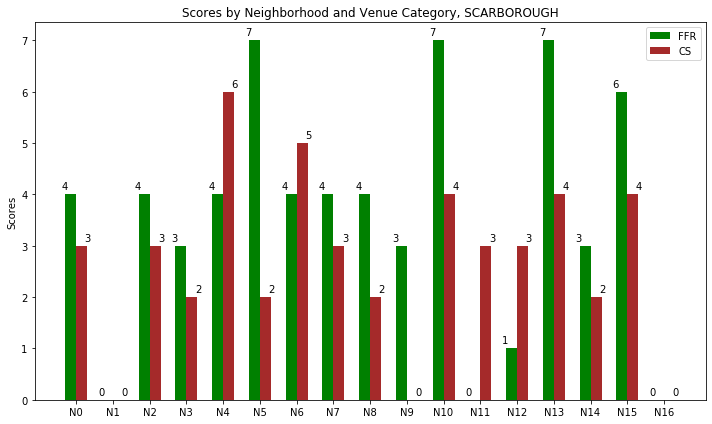

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

df_FFRs_grouped = (4, 0, 4, 3, 4, 7, 4, 4, 4, 3, 7, 0, 1, 7, 3, 6, 0)
df_CSs_grouped = (3, 0, 3, 2, 6, 2, 5, 3, 2, 0, 4, 3, 3, 4, 2, 4, 0)


ind = np.arange(len(df_FFRs_grouped))    # the x locations for the groups
width = 0.3                  # the width of the bars

fig, ax = plt.subplots( figsize=(10,6))
rects1 = ax.bar(ind - width/2, df_FFRs_grouped, width, color='green', label='FFR')
rects2 = ax.bar(ind + width/2, df_CSs_grouped,  width, color='brown',label='CS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Scores by Neighborhood and Venue Category, SCARBOROUGH')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.set_xticklabels(('N0','N1','N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N12','N13','N14','N15','N16'))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    *xpos* indicates which side to place the text w.r.t. the bar center.
    *xpos* can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        width = rect.get_width()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + width/2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()

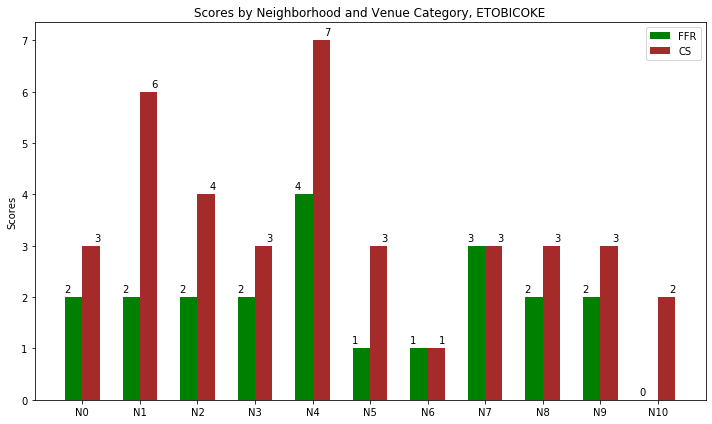

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

df_FFRe_grouped = (2, 2, 2, 2, 4, 1, 1, 3, 2, 2, 0)
df_CSe_grouped = (3, 6, 4, 3, 7, 3, 1, 3, 3, 3, 2)


ind = np.arange(len(df_FFRe_grouped))    # the x locations for the groups
width = 0.3                  # the width of the bars

fig, ax = plt.subplots( figsize=(10,6))
rects1 = ax.bar(ind - width/2, df_FFRe_grouped, width, color='green', label='FFR')
rects2 = ax.bar(ind + width/2, df_CSe_grouped,  width, color='brown', label='CS')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Scores by Neighborhood and Venue Category, ETOBICOKE')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.set_xticklabels(('N0','N1','N2','N3','N4','N5','N6','N7','N8','N9','N10'))
ax.legend()

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    *xpos* indicates which side to place the text w.r.t. the bar center.
    *xpos* can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        width = rect.get_width()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + width/2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()

#### (3) Frequencies of Brand Names in the Borough

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
vc_FFR = df_FFRs.venue_name.value_counts() 
print('----Total = {}----'.format(df_FFRs.venue_name.count()) )
print(vc_FFR) 
print('------------------')

vc_CS = df_CSs.venue_name.value_counts() 
print('----Total = {}----'.format(df_CSs.venue_name.count()) )
print(vc_CS) 
print('------------------')


----Total = 61----
Subway                        15
McDonald's                    12
Dairy Queen                    8
KFC                            7
Taco Bell                      4
Wendy's                        3
Popeyes Louisiana Kitchen      3
Burger King                    2
Chick·n·delish                 1
A&W                            1
Da Hal Yee Noodle & Congee     1
Harden Fast Food Ltd.          1
Aunty Mary's                   1
Quiznos                        1
Wing Machine                   1
Name: venue_name, dtype: int64
------------------
----Total = 46----
Tim Hortons                                     24
Starbucks                                        7
Country Style                                    5
Coffee Time                                      2
Tim Hortons / Esso                               1
Gateway On The Go (Guildwood GO/VIA Station)     1
Timothy's World Coffee                           1
Timothy's Coffee                                 1
Second Cu

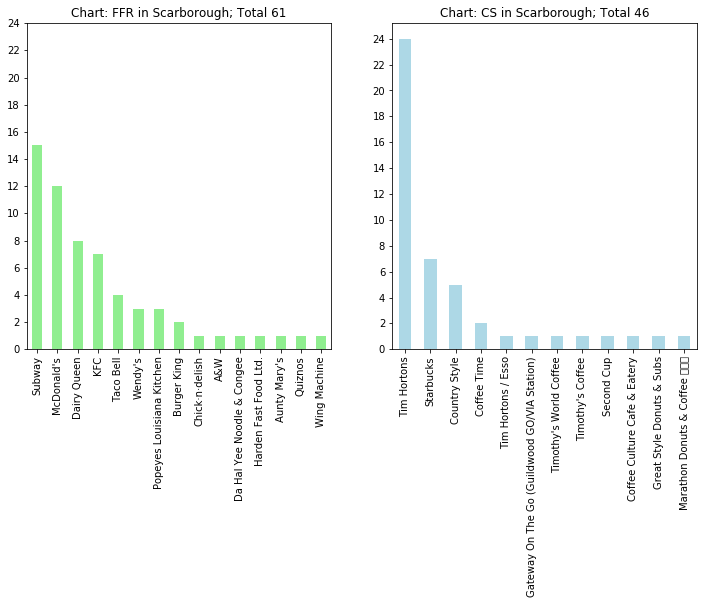

In [46]:
#  https://matplotlib.org/tutorials/introductory/pyplot.html

plt.figure( figsize=(12, 6) )

plt.subplot(121)
vc_FFR.plot(kind='bar', color='lightgreen')
plt.title('Chart: FFR in Scarborough; Total 61') 
plt.yticks(np.arange(0,25,2))

plt.subplot(122)
vc_CS.plot(kind='bar', color='lightblue')
plt.title('Chart: CS in Scarborough; Total 46') 
plt.yticks(np.arange(0,25,2))

plt.show()


In [38]:
vc_FFR = df_FFRe.venue_name.value_counts() 
print('----Total = {}----'.format(df_FFRe.venue_name.count()) )
print(vc_FFR) 
print('------------------')

vc_CS = df_CSe.venue_name.value_counts() 
print('----Total = {}----'.format(df_CSe.venue_name.count()) )
print(vc_CS) 
print('------------------')


----Total = 21----
Subway                                                 12
McDonald's                                              4
Dairy Queen                                             2
Chester's Fried Chicken & Scarlett Convenience Plus     1
KFC                                                     1
Halibut House Fish and Chips Inc.                       1
Name: venue_name, dtype: int64
------------------
----Total = 38----
Tim Hortons                     18
Starbucks                       12
Country Style                    2
Tim Hortons / Esso               1
Timothy's World Coffee           1
Coffee time                      1
Coffee Time                      1
Big Guy's Little Coffee Shop     1
My Daily Grind                   1
Name: venue_name, dtype: int64
------------------


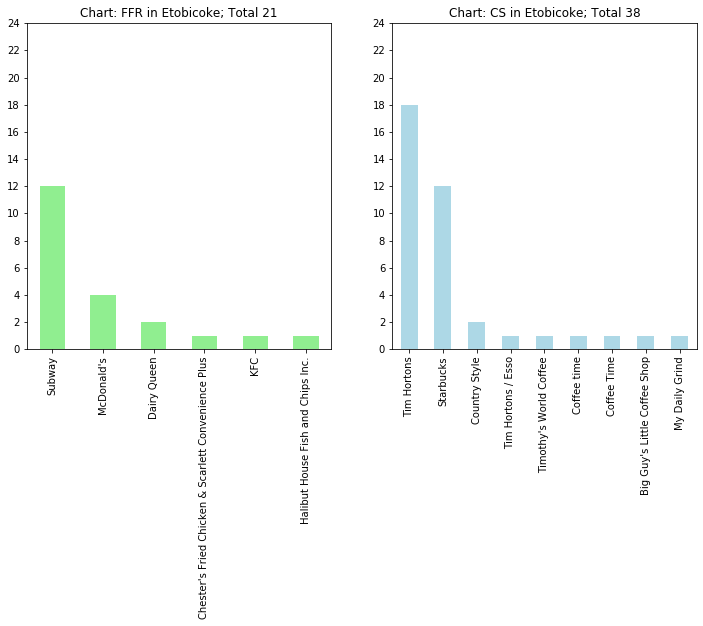

In [41]:
#  https://matplotlib.org/tutorials/introductory/pyplot.html

plt.figure( figsize=(12, 6) )

plt.subplot(121)
vc_FFR.plot(kind='bar', color='lightgreen')
plt.title('Chart: FFR in Etobicoke; Total 21') 
plt.yticks(np.arange(0,25,2))

plt.subplot(122)
vc_CS.plot(kind='bar', color='lightblue')
plt.title('Chart: CS in Etobicoke; Total 38') 
plt.yticks(np.arange(0,25,2))

plt.show()


# END